In [246]:
#import all relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import warnings
from collections import defaultdict
%matplotlib inline 

In [247]:
#read in first csv file with data
df1 = pd.read_csv('Desktop/NBA_Data/advanced_stats_total.csv')

In [248]:
df1.head()

,Unnamed: 0,Rk,Team,Age,W,L,PW,PL,MOV,SOS,...,TOV_percent_defense,DRB_percent,FT/FGA_defense,Arena,Attend,Attend/G,...29,...30,...31,Year
0,1,Rk,Team,Age,W,L,PW,PL,MOV,SOS,...,NaN,eFG%,TOV%,DRB%,FT/FGA,NaN,Arena,Attend.,Attend./G,2000
1,2,1,Los Angeles Lakers*,29.2,67,15,64,18,8.55,-0.14,...,NaN,.443,13.4,73.1,.222,NaN,STAPLES Center,"771,420",NaN,2000
2,3,2,Portland Trail Blazers*,29.6,59,23,59,23,6.40,-0.04,...,NaN,.461,13.8,72.4,.217,NaN,Rose Garden Arena,"835,078",NaN,2000
3,4,3,San Antonio Spurs*,30.9,53,29,58,24,5.94,-0.02,...,NaN,.451,13.5,73.0,.188,NaN,Alamodome,"884,450",NaN,2000
4,5,4,Phoenix Suns*,28.6,53,29,56,26,5.22,0.02,...,NaN,.454,15.7,70.5,.245,NaN,America West Arena,"773,115",NaN,2000


In [249]:
df1.tail()

,Unnamed: 0,Rk,Team,Age,W,L,PW,PL,MOV,SOS,...,TOV_percent_defense,DRB_percent,FT/FGA_defense,Arena,Attend,Attend/G,...29,...30,...31,Year
758,759,27,Charlotte Hornets,25.3,27,55,26,56,-6.24,0.35,...,NaN,.544,12.5,75.5,.211,NaN,Spectrum Center,"702,052","17,123",2023
759,760,28,Houston Rockets,22.1,22,60,23,59,-7.85,0.24,...,NaN,.564,11.8,75.8,.218,NaN,Toyota Center,"668,865","16,314",2023
760,761,29,Detroit Pistons,24.1,17,65,22,60,-8.22,0.49,...,NaN,.557,11.9,74.0,.231,NaN,Little Caesars Arena,"759,715","18,596",2023
761,762,30,San Antonio Spurs,23.9,22,60,19,63,-10.04,0.22,...,NaN,.576,12.0,74.9,.201,NaN,AT&T Center,"694,434","15,508",2023
762,763,NaN,League Average,26.3,NaN,NaN,41,41,0.00,0.00,...,NaN,.545,12.5,76.0,.208,NaN,NaN,"739,257","17,993",2023


In [250]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           763 non-null    int64  
 1   Rk                   739 non-null    object 
 2   Team                 763 non-null    object 
 3   Age                  763 non-null    object 
 4   W                    739 non-null    object 
 5   L                    739 non-null    object 
 6   PW                   763 non-null    object 
 7   PL                   763 non-null    object 
 8   MOV                  763 non-null    object 
 9   SOS                  763 non-null    object 
 10  SRS                  763 non-null    object 
 11  OPtg                 763 non-null    object 
 12  DRtg                 763 non-null    object 
 13  NRtg                 739 non-null    object 
 14  Pace                 763 non-null    object 
 15  FTr                  763 non-null    obj

In [251]:
df1.size

25179

In [252]:
df1.shape

(763, 33)

In [253]:
df1.dtypes

Unnamed: 0               int64
Rk                      object
Team                    object
Age                     object
W                       object
L                       object
PW                      object
PL                      object
MOV                     object
SOS                     object
SRS                     object
OPtg                    object
DRtg                    object
NRtg                    object
Pace                    object
FTr                     object
3PAr                    object
TS_percent              object
eFG_percent_offense    float64
TOV_percent_offense     object
ORB_percent             object
FT/FGA_offense          object
eFG_percent_defense     object
TOV_percent_defense    float64
DRB_percent             object
FT/FGA_defense          object
Arena                   object
Attend                  object
Attend/G               float64
...29                   object
...30                   object
...31                   object
Year    

In [254]:
df1 = df1.rename(columns={
    'Rk': 'Rank',
    'W': 'Wins',
    'L': 'Losses',
    'PW': 'Pythagorean Wins', 
    'PL': 'Pythagorean Losses', 
    'MOV': 'Margin of Victory',
    'SOS': 'Strength of Schedule',
    'SRS': 'Simple Rating System',
    'OPtg': 'Offensive Rating',
    'DRtg': 'Defensive Rating',
    'NRtg': 'Net Rating',
    'FTr': 'Free Throw Rate',
    '3PAr': 'Three-Point Attempt Rate',
    'TS_percent': 'True Shooting Percentage',
    'eFG_percent_offense': 'Effective Field Goal Percentage on Offense',
    'TOV_percent_offense': 'Turnover Percentage on Offense',
    'ORB_percent': 'Offensive Rebound Percentage',
    'FT/FGA_offense': 'Free Throws per Field Goal Attempt on Offense',
    'eFG_percent_defense': 'Effective Field Goal Percentage on Defense',
    'TOV_percent_defense': 'Turnover Percentage on Defense',
    'DRB_percent': 'Defensive Rebound Percentage',
    'FT/FGA_defense': 'Free Throws per Field Goal Attempt on Defense',
    'Attend': 'Attendance', 
    '...29': 'Venue',
    'Unnamed: 0': 'Index'
})


In [255]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 763 entries, 0 to 762
Data columns (total 33 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Index                                          763 non-null    int64  
 1   Rank                                           739 non-null    object 
 2   Team                                           763 non-null    object 
 3   Age                                            763 non-null    object 
 4   Wins                                           739 non-null    object 
 5   Losses                                         739 non-null    object 
 6   Pythagorean Wins                               763 non-null    object 
 7   Pythagorean Losses                             763 non-null    object 
 8   Margin of Victory                              763 non-null    object 
 9   Strength of Schedule                           763 non

In [256]:
columns_to_remove = [
    'Pythagorean Wins',
    'Pythagorean Losses',
    'Margin of Victory',
    '...30',
    '...31',
    'True Shooting Percentage',
    'Effective Field Goal Percentage on Offense',
    'Turnover Percentage on Offense',
    'Offensive Rebound Percentage',
    'Free Throws per Field Goal Attempt on Offense',
    'Effective Field Goal Percentage on Defense',
    'Turnover Percentage on Defense',
    'Defensive Rebound Percentage',
    'Free Throws per Field Goal Attempt on Defense',
    'Attend/G',
    '...30',
    '...31'
]

df1.drop(columns = columns_to_remove, inplace = True)

In [257]:
df1.drop(0, inplace = True)

In [258]:
df1.drop(762, inplace = True)

In [259]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 761 entries, 1 to 761
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Index                     761 non-null    int64 
 1   Rank                      738 non-null    object
 2   Team                      761 non-null    object
 3   Age                       761 non-null    object
 4   Wins                      738 non-null    object
 5   Losses                    738 non-null    object
 6   Strength of Schedule      761 non-null    object
 7   Simple Rating System      761 non-null    object
 8   Offensive Rating          761 non-null    object
 9   Defensive Rating          761 non-null    object
 10  Net Rating                738 non-null    object
 11  Pace                      761 non-null    object
 12  Free Throw Rate           761 non-null    object
 13  Three-Point Attempt Rate  761 non-null    object
 14  Arena                     

In [260]:
import re

def remove_asterisk(team):
    return re.sub(r'\*$', '', team)

df1['Team'] = df1['Team'].apply(remove_asterisk)

In [261]:
# BROAD ANALYSIS

In [262]:
 #List of Seasons: 
df1['Year'].unique()

array([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021,
       2022, 2023])

In [263]:
#List of Venues: 
df1['Venue'].unique()

array(['STAPLES Center', 'Rose Garden Arena', 'Alamodome',
       'America West Arena', 'Delta Center', 'Conseco Fieldhouse',
       'AmericanAirlines Arena', 'ARCO Arena (II)', 'Charlotte Coliseum',
       'Target Center', 'Madison Square Garden (IV)',
       'The Palace of Auburn Hills', 'First Union Center',
       'KeyArena at Seattle Center', 'TD Waterhouse Centre',
       'Bradley Center', 'Air Canada Centre', 'Reunion Arena',
       'FleetCenter', 'Compaq Center', 'Continental Airlines Arena',
       'Pepsi Center', 'MCI Center', 'Gund Arena', 'Philips Arena',
       'General Motors Place', 'The Arena in Oakland', 'United Center',
       nan, 'Arena', 'American Airlines Center', 'Pyramid Arena',
       'SBC Center', 'New Orleans Arena', 'Toyota Center',
       'Wachovia Center', 'FedEx Forum', 'Oakland Arena',
       'TD Banknorth Garden', 'Ford Center', 'Charlotte Bobcats Arena',
       'AT&T Center', 'US Airways Center', 'Quicken Loans Arena',
       'EnergySolutions Arena', '

In [264]:
#List of Teams: 
df1['Team'].unique()

array(['Los Angeles Lakers', 'Portland Trail Blazers',
       'San Antonio Spurs', 'Phoenix Suns', 'Utah Jazz', 'Indiana Pacers',
       'Miami Heat', 'Sacramento Kings', 'Charlotte Hornets',
       'Minnesota Timberwolves', 'New York Knicks', 'Detroit Pistons',
       'Philadelphia 76ers', 'Seattle SuperSonics', 'Orlando Magic',
       'Milwaukee Bucks', 'Toronto Raptors', 'Dallas Mavericks',
       'Boston Celtics', 'Houston Rockets', 'New Jersey Nets',
       'Denver Nuggets', 'Washington Wizards', 'Cleveland Cavaliers',
       'Atlanta Hawks', 'Vancouver Grizzlies', 'Golden State Warriors',
       'Chicago Bulls', 'Los Angeles Clippers', 'League Average', 'Team',
       'Memphis Grizzlies', 'New Orleans Hornets', 'Charlotte Bobcats',
       'New Orleans/Oklahoma City Hornets', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'New Orleans Pelicans'], dtype=object)

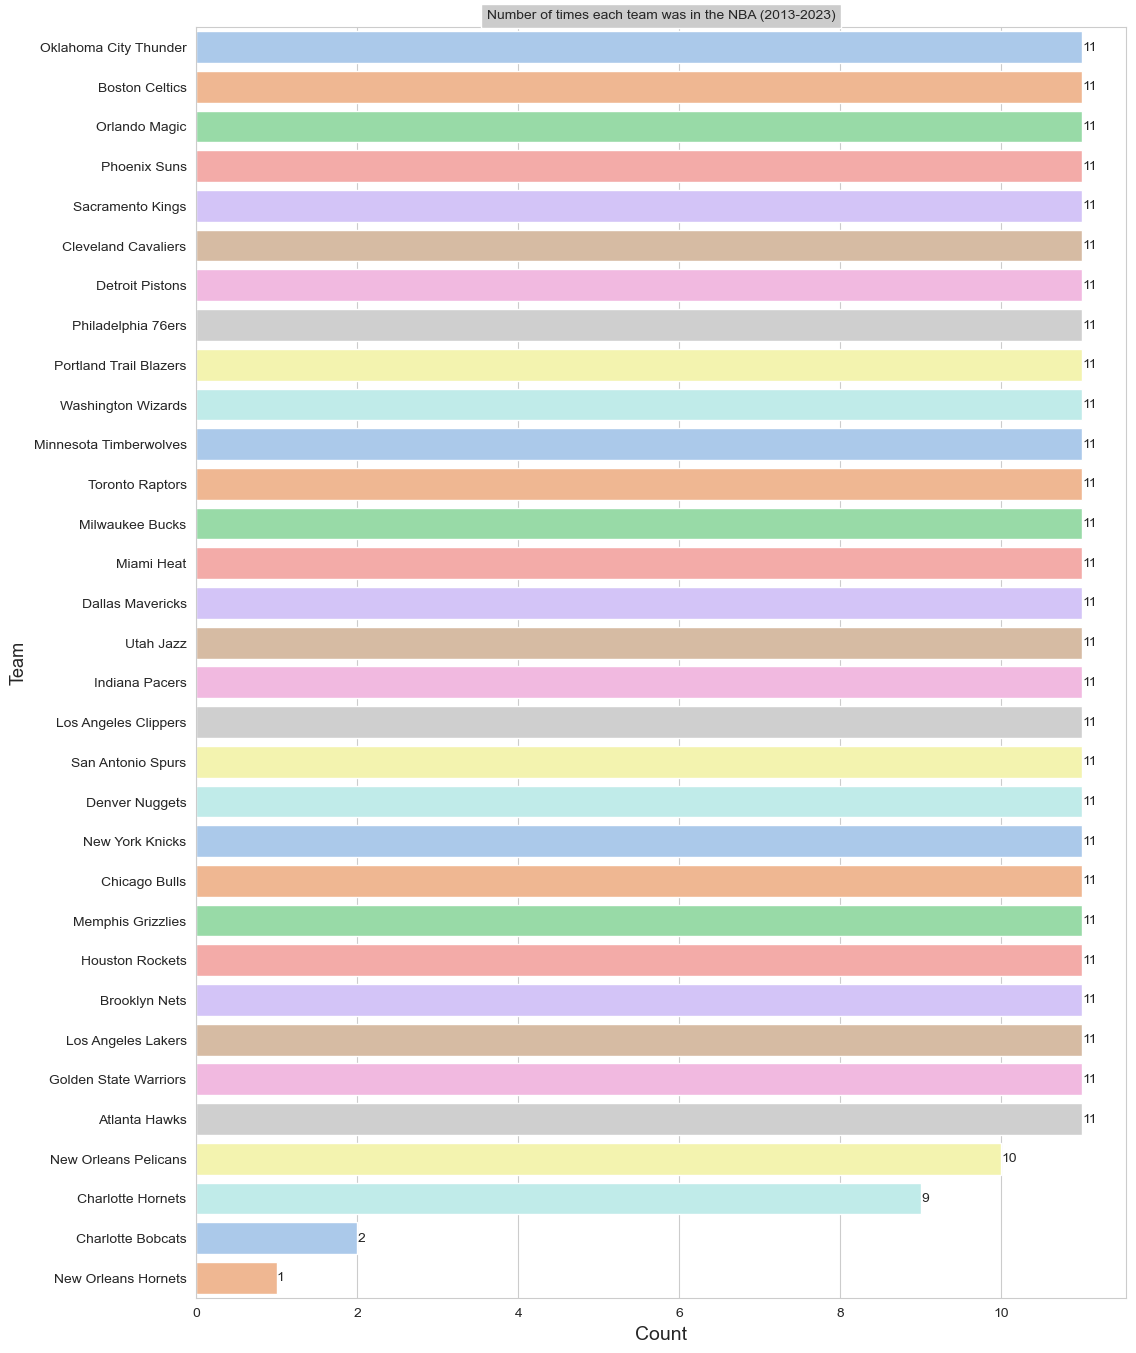

In [265]:
# Bar Chart showing Number of times each team played in the NBA (2013-2023): 

# List of teams to exclude
teams_to_exclude = ['League Average', 'Team']

# Filter the dataframe for the teams and the years
df_filtered = df1[(~df1['Team'].isin(teams_to_exclude)) & (df1['Year'] >= 2013) & (df1['Year'] <= 2023)]

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize = (12,16.5), dpi = 100)

# Count the data
team_counts = df_filtered['Team'].value_counts()

# Create bar chart
bar_chart = sns.barplot(y = team_counts.index, x = team_counts.values, palette = color, orient='h')

# Add counts at the end of each bar
bar_chart.bar_label(bar_chart.containers[0])

# Set title and labels
plt.title("Number of times each team was in the NBA (2013-2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()


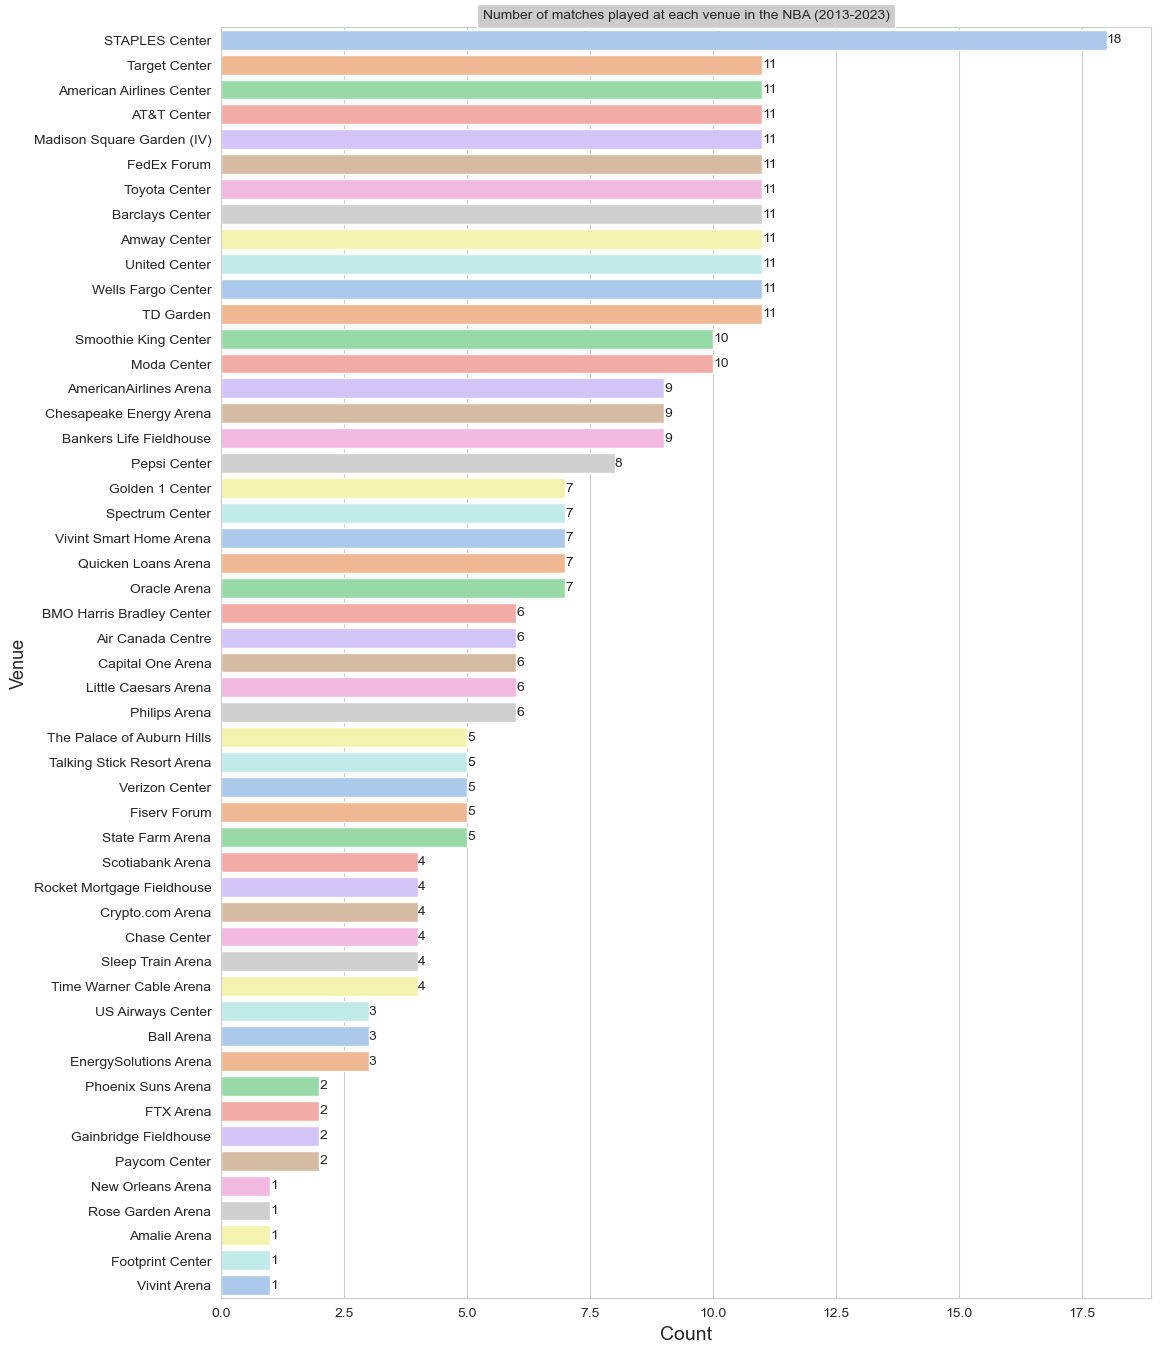

In [266]:
# Bar Chart showing Number of matches played at each venue in the NBA (2013-2023): 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Filter data for the period of 2013-2023
df_filtered = df_filtered[(df_filtered['Year'] >= 2013) & (df_filtered['Year'] <= 2023)]

# Count the data
venue_counts = df_filtered['Venue'].value_counts()

 # Plot size
plt.figure(figsize=(12,16.5), dpi=100)

# Create bar chart
bar_chart = sns.barplot(y = venue_counts.index, x = venue_counts.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart.bar_label(bar_chart.containers[0])

# Set title and labels
plt.title("Number of matches played at each venue in the NBA (2013-2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Venue', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)


plt.show()

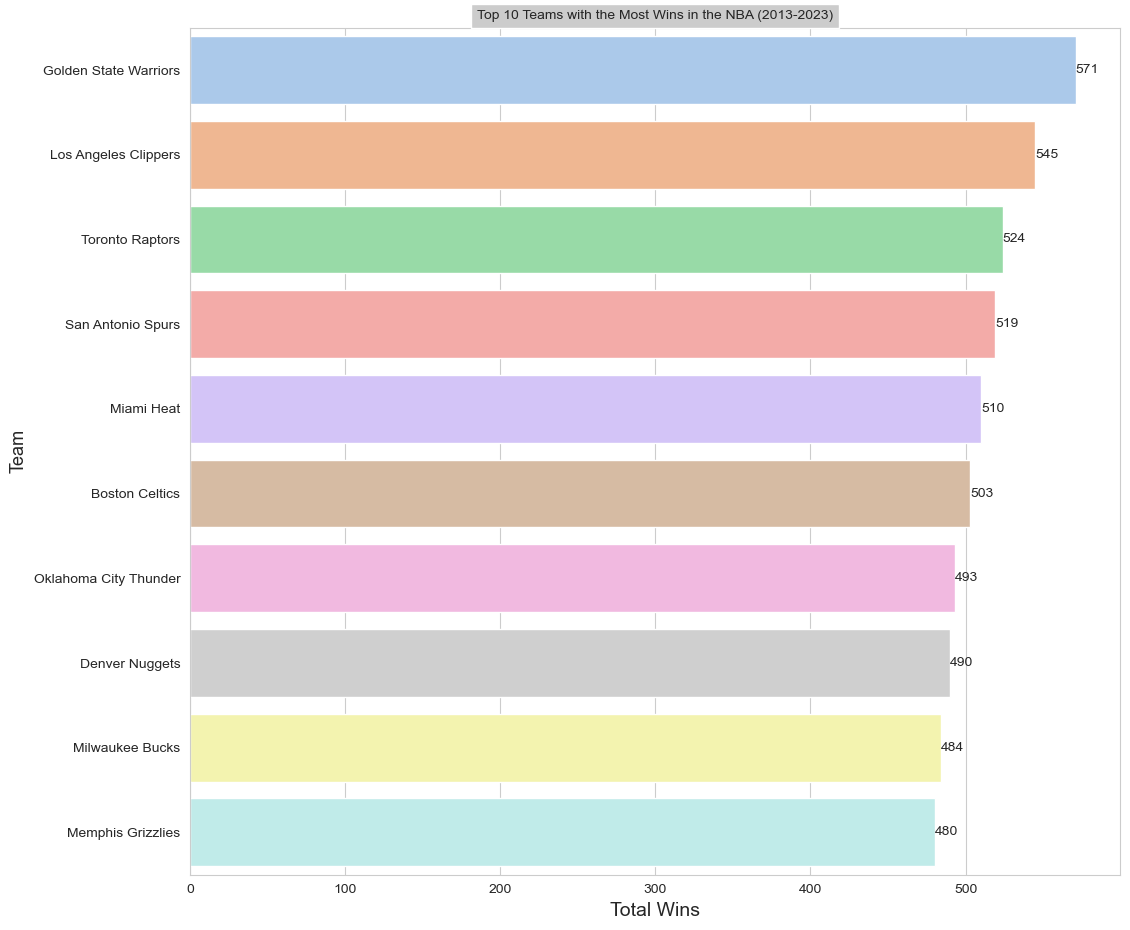

In [267]:
# Bar Chart showing teams with the most wins in the NBA (2013-2023): 

# Convert 'Wins' column to numeric
df1['Wins'] = pd.to_numeric(df1['Wins'], errors='coerce')

# Filter data for the period of 2013-2023
df_filtered = df1[(df1['Year'] >= 2013) & (df1['Year'] <= 2023)]

# Group by 'Team' and sum 'Wins'
team_wins = df_filtered.groupby('Team')['Wins'].sum()

# Sort the teams by wins and select the top 10
team_wins = team_wins.sort_values(ascending=False).head(10)

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(12,11), dpi=100)

# Create bar chart
bar_chart = sns.barplot(y = team_wins.index, x = team_wins.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart.bar_label(bar_chart.containers[0])

# Set title and labels
plt.title("Top 10 Teams with the Most Wins in the NBA (2013-2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Total Wins', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()


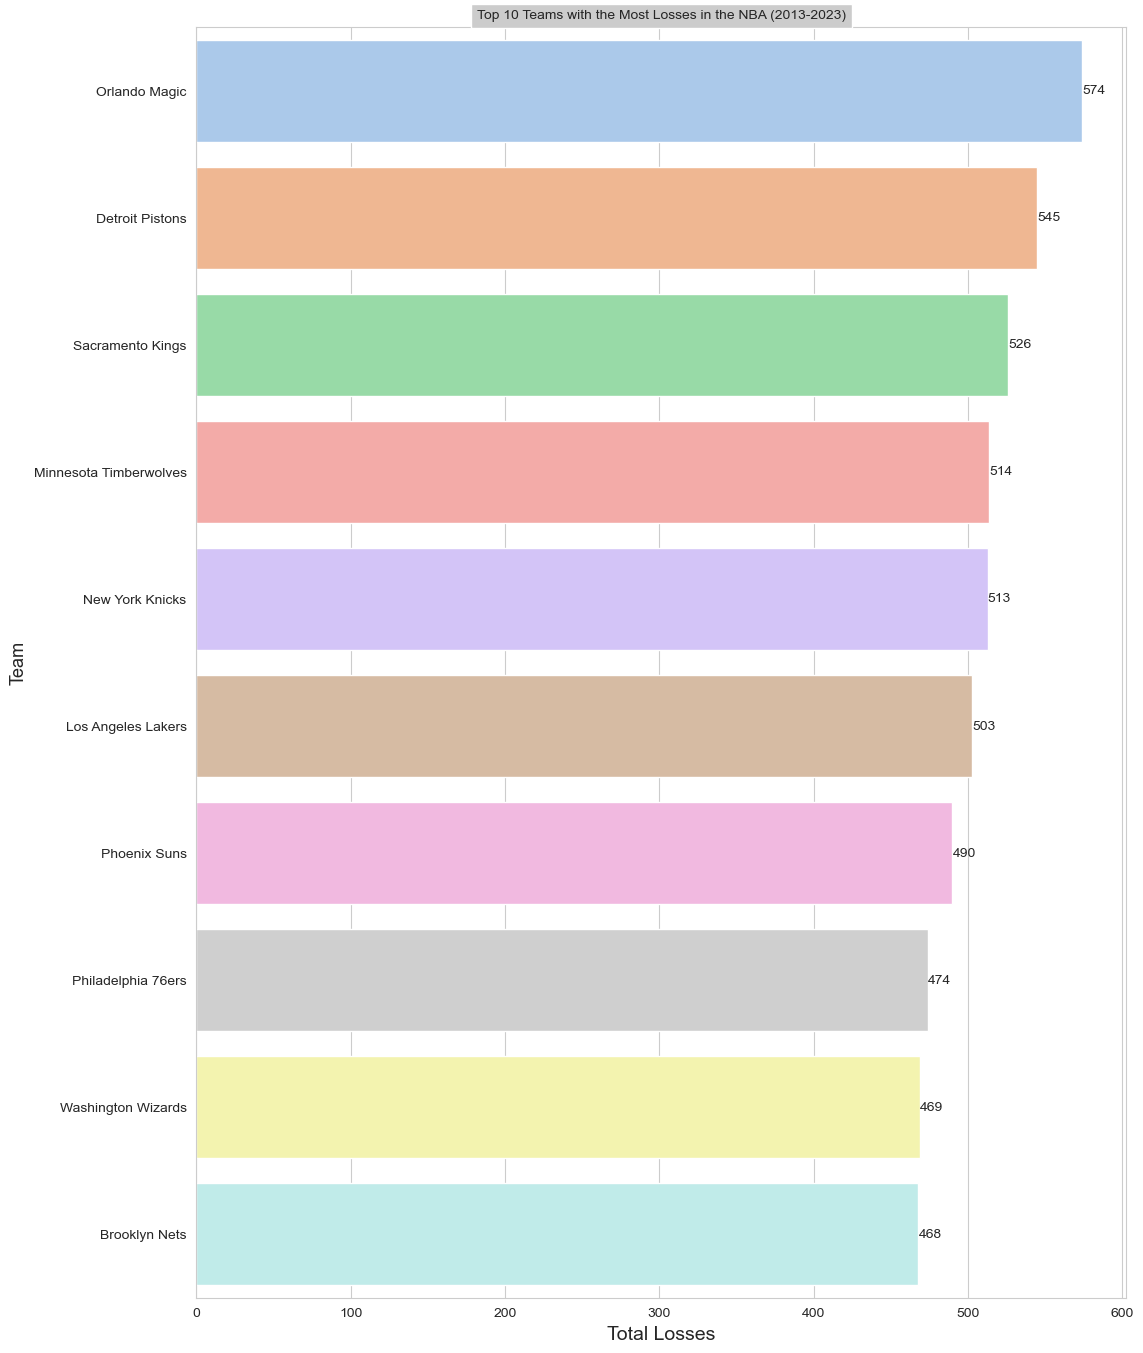

In [268]:
# Bar Chart showing teams with the most losses in the NBA (2013-2023): 

# Convert 'Losses' column to numeric
df1['Losses'] = pd.to_numeric(df1['Losses'], errors='coerce')

# Filter data for the period of 2013-2023
df_filtered = df1[(df1['Year'] >= 2013) & (df1['Year'] <= 2023)]

# Group by 'Team' and sum 'Losses'
team_losses = df_filtered.groupby('Team')['Losses'].sum()

# Sort the teams by losses and select the top 10
team_losses = team_losses.sort_values(ascending=False).head(10)

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(12,16.5), dpi=100)

# Create bar chart
bar_chart = sns.barplot(y = team_losses.index, x = team_losses.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart.bar_label(bar_chart.containers[0])

# Set title and labels
plt.title("Top 10 Teams with the Most Losses in the NBA (2013-2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Total Losses', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()


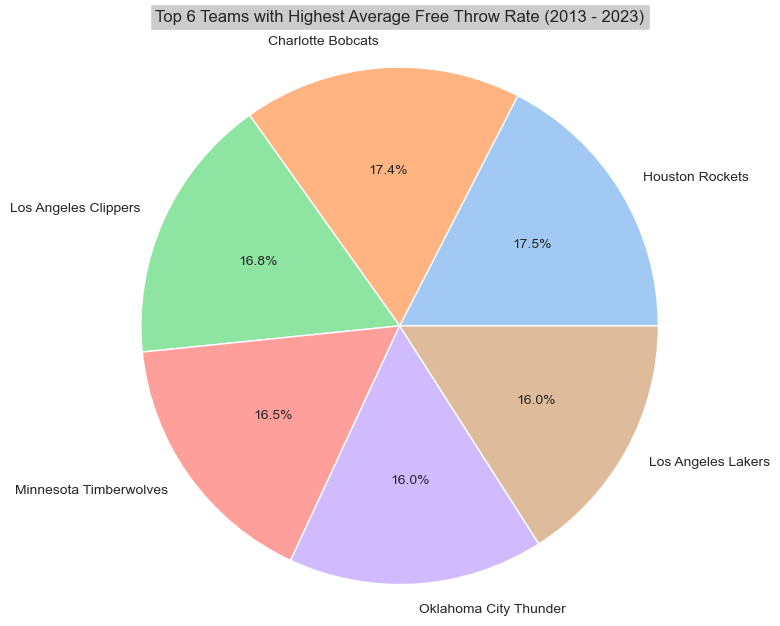

In [269]:
# Pie Chart showing the top 6 Teams with Highest Average Free Throw Rate (2013 - 2023)

# Convert the 'Free Throw Rate' column to float
df1['Free Throw Rate'] = pd.to_numeric(df1['Free Throw Rate'], errors='coerce')

# Filter the data for the years 2013 - 2023
df_filtered = df1[df1['Year'].between(2013, 2023)]

# Group by the 'Team' column and calculate the mean 'Free Throw Rate'
data = df_filtered.groupby('Team')['Free Throw Rate'].mean()

# Sort the data in descending order to get the teams with the highest average free throw rate
data = data.sort_values(ascending=False)

# Select only the top 6 teams
data = data[:6]

plt.title("Top 6 Teams with Highest Average Free Throw Rate (2013 - 2023)", bbox={'facecolor':'0.8'}, y = 1.3, fontsize = 12, loc = 'center')

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting data on chart
piechart = plt.pie(data, labels=data.index, colors=palette_color, \
        autopct='%.1f%%', radius = 1.75)

# Displaying chart
plt.show()

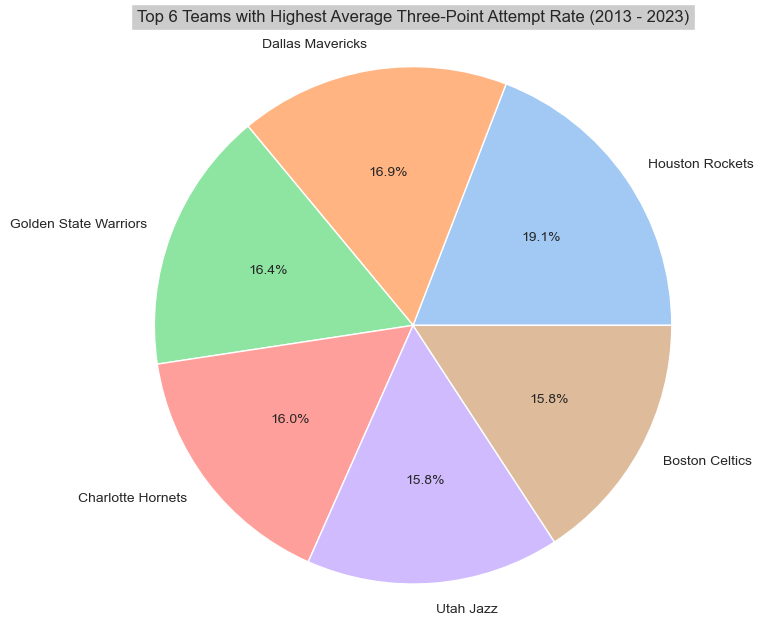

In [271]:
# Pie Chart showing the top 6 Teams with Highest Average Three-Point Attempt Rate (2013 - 2023)

# Convert the 'Three-Point Attempt Rate' column to float
df1['Three-Point Attempt Rate'] = pd.to_numeric(df1['Three-Point Attempt Rate'], errors='coerce')

# Filter the data for the years 2013 - 2023
df_filtered = df1[df1['Year'].between(2013, 2023)]

# Group by the 'Team' column and calculate the mean 'Three-Point Attempt Rate'
data = df_filtered.groupby('Team')['Three-Point Attempt Rate'].mean()

# Sort the data in descending order to get the teams with the highest average three-point attempt rate
data = data.sort_values(ascending=False)

# Select only the top 6 teams
data = data[:6]

plt.title("Top 6 Teams with Highest Average Three-Point Attempt Rate (2013 - 2023)", bbox={'facecolor':'0.8'}, y = 1.3, fontsize = 12, loc = 'center')

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')

# Plotting data on chart
piechart = plt.pie(data, labels=data.index, colors=palette_color, \
        autopct='%.1f%%', radius = 1.75)

# Displaying chart
plt.show()


In [273]:
# 2023 NBA SEASON ANALYSIS

In [274]:
# List of Teams for 2023: 
df1_2023 = df1[df1['Year'] == 2023]
df1_2023['Team'].unique()

array(['Team', 'Boston Celtics', 'Cleveland Cavaliers',
       'Philadelphia 76ers', 'Memphis Grizzlies', 'Milwaukee Bucks',
       'Denver Nuggets', 'New York Knicks', 'Sacramento Kings',
       'Phoenix Suns', 'New Orleans Pelicans', 'Golden State Warriors',
       'Toronto Raptors', 'Chicago Bulls', 'Oklahoma City Thunder',
       'Brooklyn Nets', 'Los Angeles Lakers', 'Los Angeles Clippers',
       'Atlanta Hawks', 'Dallas Mavericks', 'Minnesota Timberwolves',
       'Miami Heat', 'Utah Jazz', 'Washington Wizards', 'Orlando Magic',
       'Indiana Pacers', 'Portland Trail Blazers', 'Charlotte Hornets',
       'Houston Rockets', 'Detroit Pistons', 'San Antonio Spurs'],
      dtype=object)

In [275]:
# List of Venues for 2023: 
df1_2023 = df1[df1['Year'] == 2023]
df1_2023['Venue'].unique()

array(['Arena', 'TD Garden', 'Rocket Mortgage Fieldhouse',
       'Wells Fargo Center', 'FedEx Forum', 'Fiserv Forum', 'Ball Arena',
       'Madison Square Garden (IV)', 'Golden 1 Center',
       'Footprint Center', 'Smoothie King Center', 'Chase Center',
       'Scotiabank Arena', 'United Center', 'Paycom Center',
       'Barclays Center', 'Crypto.com Arena', 'State Farm Arena',
       'American Airlines Center', 'Target Center', 'FTX Arena',
       'Vivint Arena', 'Capital One Arena', 'Amway Center',
       'Gainbridge Fieldhouse', 'Moda Center', 'Spectrum Center',
       'Toyota Center', 'Little Caesars Arena', 'AT&T Center'],
      dtype=object)

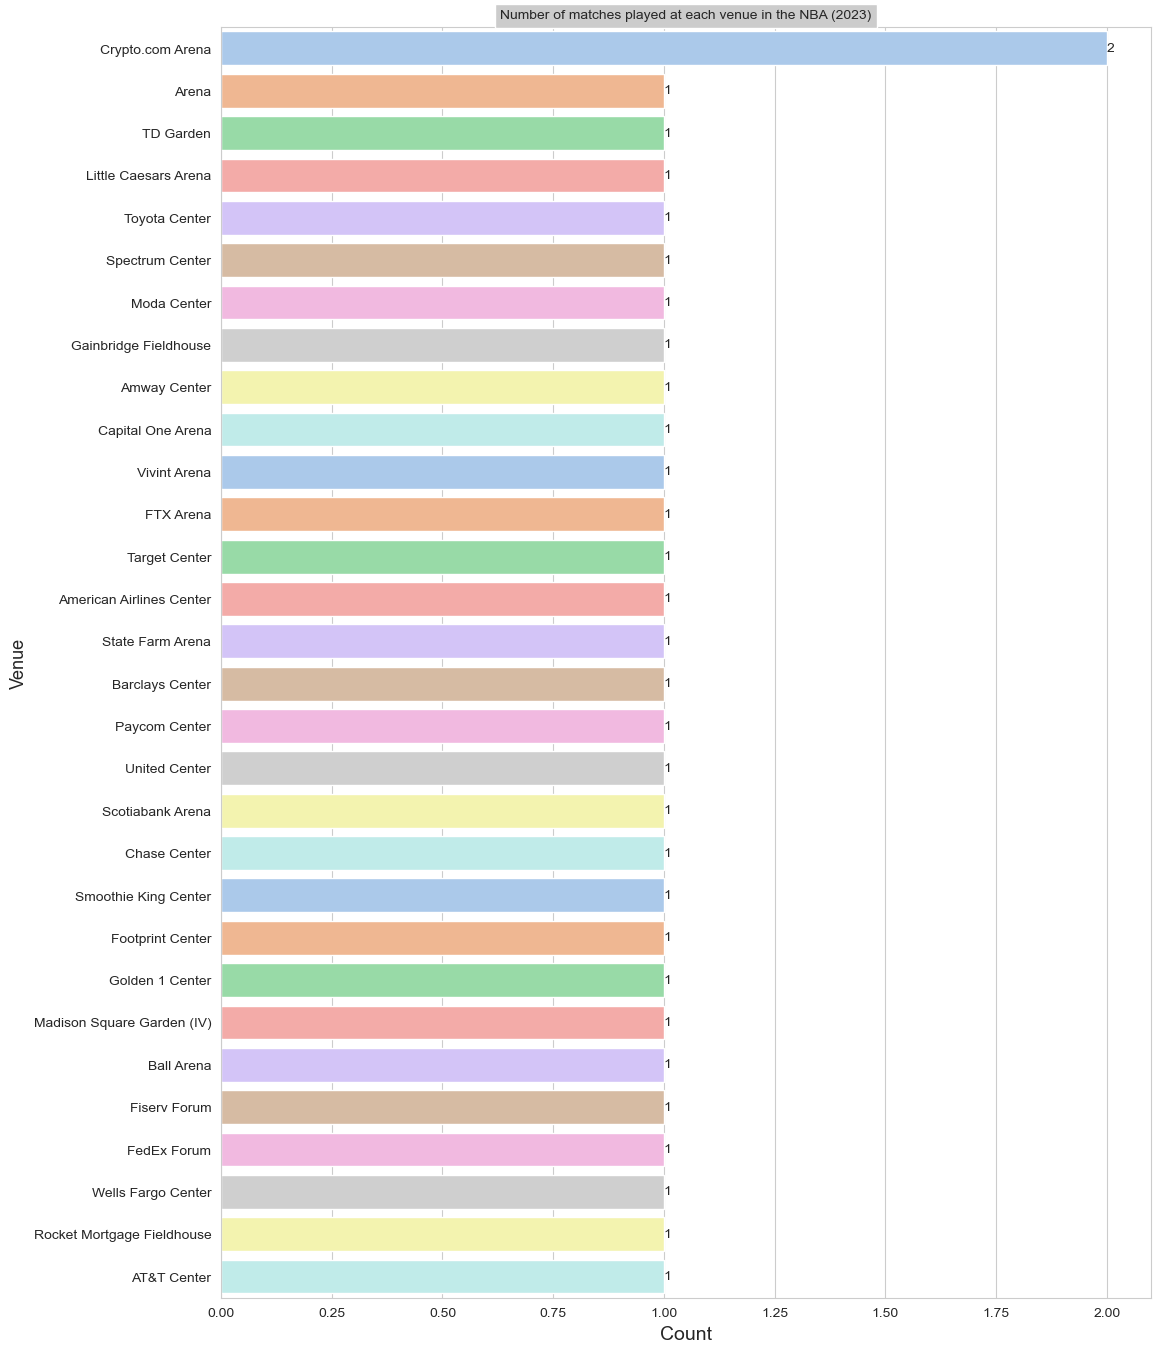

In [276]:
# Bar Chart showing Number of matches played at each venue in the NBA (2023): 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Filter data for the year 2023
df_filtered = df1[df1['Year'] == 2023]

# Count the data
venue_counts = df_filtered['Venue'].value_counts()

# Plot size
plt.figure(figsize=(12,16.5), dpi=100)

# Create bar chart
bar_chart = sns.barplot(y = venue_counts.index, x = venue_counts.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart.bar_label(bar_chart.containers[0])

# Set title and labels
plt.title("Number of matches played at each venue in the NBA (2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Count', fontsize = 14)
plt.ylabel('Venue', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()


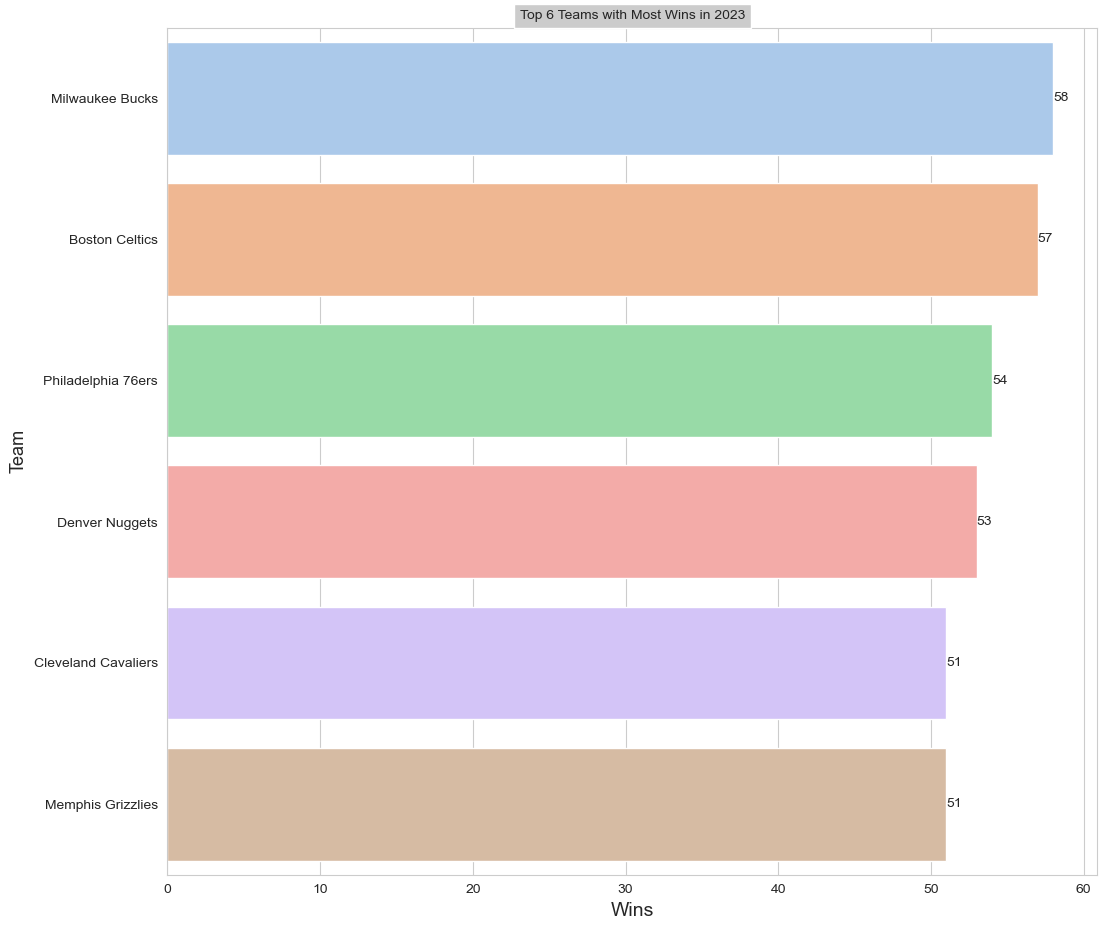

In [277]:
# Bar Chart showing the 6 teams with the most wins in the NBA (2023): 

# # Filter for the 2023 season and exclude 'League Average' and create copy 
df_2023 = df1[(df1['Year'] == 2023) & (df1['Team'] != 'League Average') &(df1['Team'] != 'Team') ].copy()

# # Convert 'Wins' column to numeric
df_2023['Wins'] = pd.to_numeric(df_2023['Wins'], errors='coerce')


# Get the top 6 teams with the most wins in 2023
top_wins_2023 = df_2023.groupby('Team')['Wins'].sum().nlargest(6)

# Plot size
plt.figure(figsize=(12,11), dpi=100)

# Create bar chart
bar_chart_wins_2023 = sns.barplot(y = top_wins_2023.index, x = top_wins_2023.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart_wins_2023.bar_label(bar_chart_wins_2023.containers[0])

# Set title and labels
plt.title('Top 6 Teams with Most Wins in 2023', bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Wins', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

plt.show()


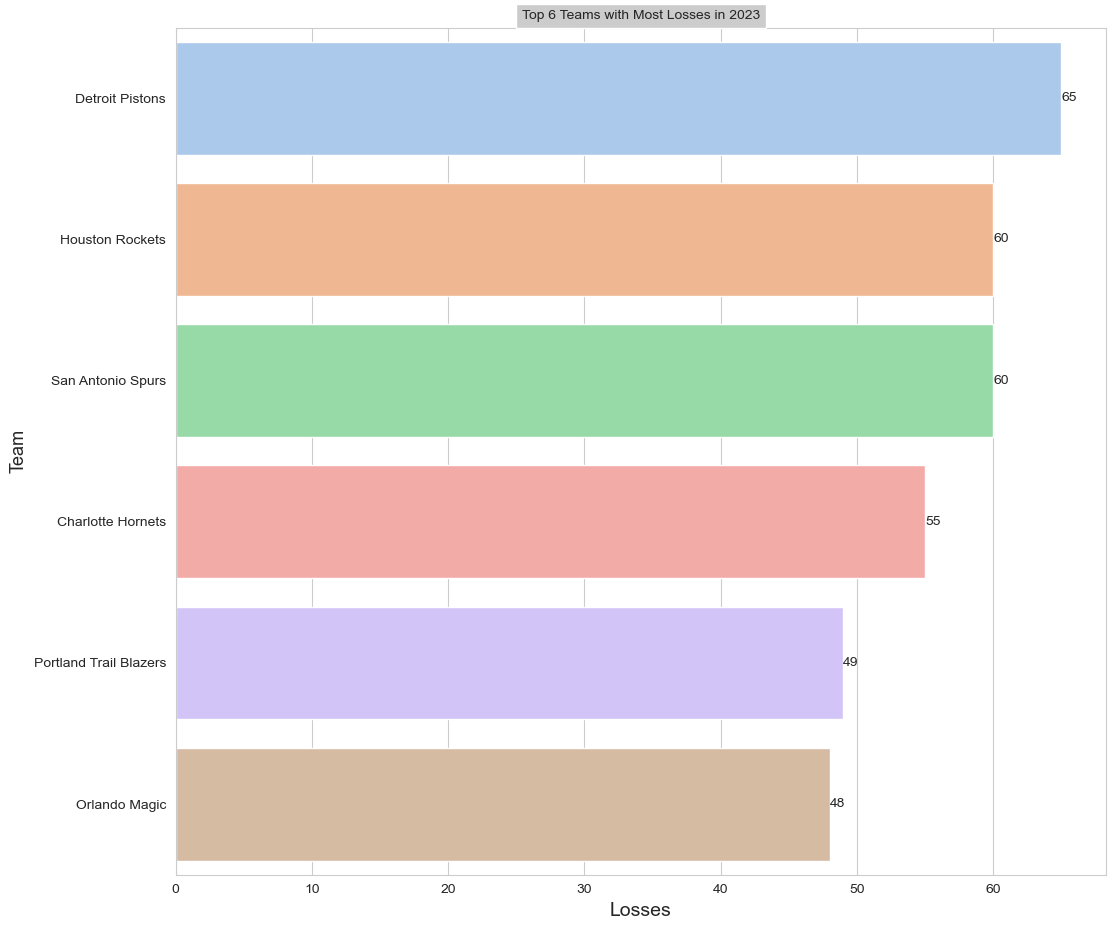

In [278]:
# Bar Chart showing the 6 teams with the most loses in the NBA (2023): 

# # Filter for the 2023 season and exclude 'League Average' and create copy 
df_2023 = df1[(df1['Year'] == 2023) & (df1['Team'] != 'League Average') & (df1['Team'] != 'Team') ].copy()

# # Convert 'Wins' column to numeric
df_2023['Losses'] = pd.to_numeric(df_2023['Losses'], errors='coerce')


# Get the top 6 teams with the most wins in 2023
top_wins_2023 = df_2023.groupby('Team')['Losses'].sum().nlargest(6)

# Plot size
plt.figure(figsize=(12,11), dpi=100)

# Create bar chart
bar_chart_wins_2023 = sns.barplot(y = top_wins_2023.index, x = top_wins_2023.values, palette = color, orient = 'h')

# Add counts at the end of each bar
bar_chart_wins_2023.bar_label(bar_chart_wins_2023.containers[0])

# Set title and labels
plt.title('Top 6 Teams with Most Losses in 2023', bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Losses', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize = 10)
plt.rc('ytick', labelsize = 10)

plt.show()

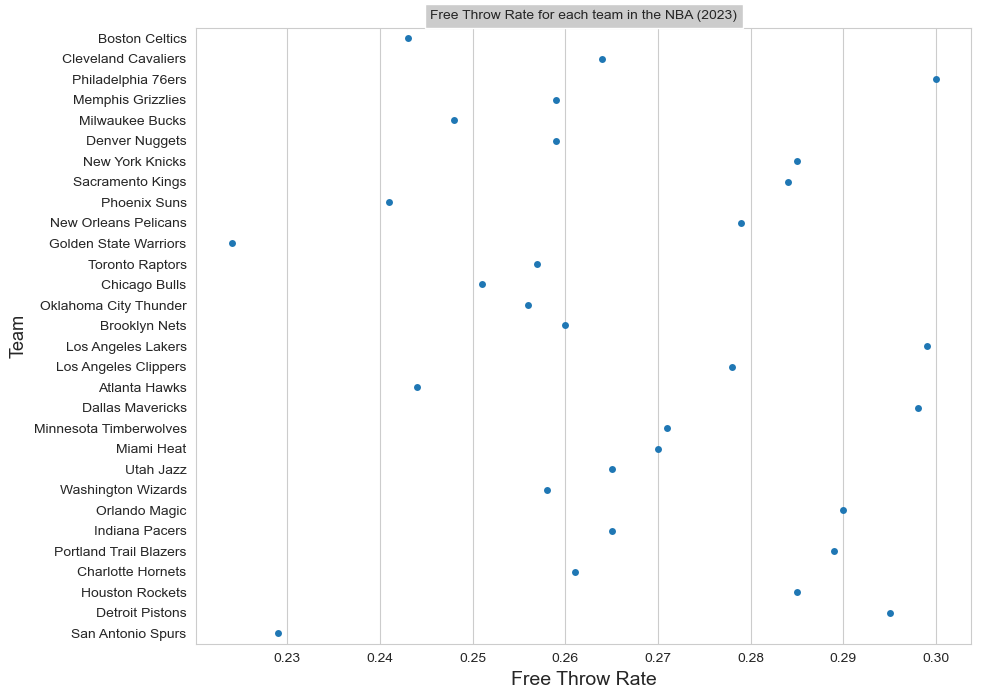

In [279]:
# Stripplot showing the Free Throw Rate for each team in the NBA (2023): 

warnings.filterwarnings('ignore', category=FutureWarning)

# Convert 'Free Throw Rate' column to numeric
df1['Free Throw Rate'] = pd.to_numeric(df1['Free Throw Rate'], errors='coerce')

# Filter data for the year 2023
df_filtered = df1[(df1['Year'] == 2023) & (df1['Team'] != 'League Average') & (df1['Team'] != 'Team') ]

# Set the style
sns.set_style("whitegrid")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Create stripplot
strip_plot = sns.stripplot(x = df_filtered['Free Throw Rate'], y = df_filtered['Team'], jitter=True)

# Set title and labels
plt.title("Free Throw Rate for each team in the NBA (2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Free Throw Rate', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()



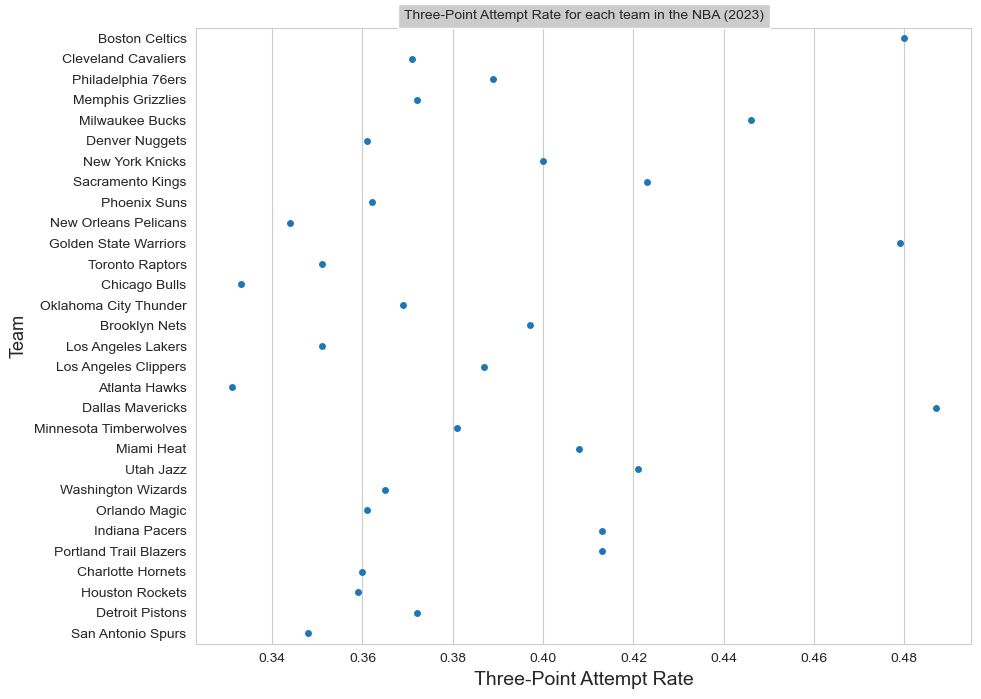

In [280]:
# Stripplot showing the Three-Point Attempt Rate for each team in the NBA (2023): 

warnings.filterwarnings('ignore', category=FutureWarning)

# Convert 'Three-Point Attempt Rate' column to numeric
df1['Three-Point Attempt Rate'] = pd.to_numeric(df1['Three-Point Attempt Rate'], errors='coerce')

# Filter data for the year 2023
df_filtered = df1[(df1['Year'] == 2023) & (df1['Team'] != 'League Average') & (df1['Team'] != 'Team') ]

# Set the style
sns.set_style("whitegrid")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Create stripplot
strip_plot = sns.stripplot(x = df_filtered['Three-Point Attempt Rate'], y = df_filtered['Team'], jitter=True)

# Set title and labels
plt.title("Three-Point Attempt Rate for each team in the NBA (2023)", bbox = {'facecolor':'0.8', 'pad':5}, fontsize = 10, y = 1.0)
plt.xlabel('Three-Point Attempt Rate', fontsize = 14)
plt.ylabel('Team', fontsize = 13)

# Set tick label size
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

plt.show()


In [281]:
# read in second csv file with data
df2 = pd.read_csv('Desktop/NBA_Data/NBA Stats 202324 All Stats  NBA Player Props Tool.csv')

In [282]:
# Get info on data: 

In [283]:
df2.head()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
0,NaN,Joel Embiid,Phi,C,30.1,39,33.6,39.6,15.0,452,...,5.6,1.2,1.7,3.8,45.7,40.3,51.3,15.3,124.0,104.8
1,NaN,Luka Doncic,Dal,G,25.1,70,37.5,36.0,14.6,608,...,9.8,1.4,0.5,4.0,43.1,43.7,52.9,15.5,121.9,109.9
2,NaN,Giannis Antetokounmpo,Mil,F,29.4,73,35.2,33.0,15.4,782,...,6.5,1.2,1.1,3.4,42.0,37.0,48.5,14.9,125.6,106.9
3,NaN,Shai Gilgeous-Alexander,Okc,G,25.8,75,34.0,32.9,9.8,649,...,6.2,2.0,0.9,2.2,35.6,36.3,41.8,11.9,128.6,107.7
4,NaN,Jalen Brunson,Nyk,G,27.6,77,35.4,32.5,10.1,497,...,6.7,0.9,0.2,2.4,32.3,35.5,39.1,10.0,124.2,112.6


In [284]:
df2.tail()

,RANK,NAME,TEAM,POS,AGE,GP,MPG,USG%,TO%,FTA,...,APG,SPG,BPG,TPG,P+R,P+A,P+R+A,VI,ORtg,DRtg
652,NaN,Justin Jackson,Min,F,29.1,2,0.4,0.0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
653,NaN,Jalen Crutcher,Nor,G,24.7,1,2.7,16.1,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
654,NaN,Andrew Funk,Chi,G,24.6,5,2.7,13.1,0.0,0,...,0.0,0.2,0.2,0.0,0.0,0.0,0.0,0.0,0.0,0.0
655,NaN,Jacob Gilyard,Bro,G,25.8,4,11.2,6.8,14.3,0,...,1.5,1.5,0.0,0.3,0.8,1.5,2.3,0.0,57.7,106.2
656,NaN,Mamadi Diakite,Nyk,F,27.2,3,2.8,10.2,50.0,0,...,0.0,0.3,0.0,0.3,0.3,0.0,0.3,0.0,0.0,0.0


In [285]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 29 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RANK    0 non-null      float64
 1   NAME    657 non-null    object 
 2   TEAM    657 non-null    object 
 3   POS     657 non-null    object 
 4   AGE     657 non-null    float64
 5   GP      657 non-null    int64  
 6   MPG     657 non-null    float64
 7   USG%    657 non-null    float64
 8   TO%     657 non-null    float64
 9   FTA     657 non-null    int64  
 10  FT%     657 non-null    float64
 11  2PA     657 non-null    int64  
 12  2P%     657 non-null    float64
 13  3PA     657 non-null    int64  
 14  3P%     657 non-null    float64
 15  eFG%    657 non-null    float64
 16  TS%     657 non-null    float64
 17  PPG     657 non-null    float64
 18  RPG     657 non-null    float64
 19  APG     657 non-null    float64
 20  SPG     657 non-null    float64
 21  BPG     657 non-null    float64
 22  TP

In [286]:
df2.size

19053

In [287]:
df2.shape

(657, 29)

In [288]:
df2.dtypes

RANK     float64
NAME      object
TEAM      object
POS       object
AGE      float64
GP         int64
MPG      float64
USG%     float64
TO%      float64
FTA        int64
FT%      float64
2PA        int64
2P%      float64
3PA        int64
3P%      float64
eFG%     float64
TS%      float64
PPG      float64
RPG      float64
APG      float64
SPG      float64
BPG      float64
TPG      float64
P+R      float64
P+A      float64
P+R+A    float64
VI       float64
ORtg     float64
DRtg     float64
dtype: object

In [289]:
# Drop  unncessary columns / columns with null values:

columns_to_remove = [
    'RANK',
    'VI',
    'ORtg',
    'DRtg',
]

df2.drop(columns = columns_to_remove, inplace = True)


In [290]:
# Rename columns with more meaningful names: 

df2 = df2.rename(columns={
    'NAME': 'Name',
    'TEAM': 'Team',
    'POS': 'Position',
    'AGE': 'Age',
    'GP': 'Games Played',
    'MPG': 'Minutes Per Game',
    'USG%': 'Usage Percentage',
    'TO%': 'Turnover Percentage',
    'FTA': 'Free Throw Attempts',
    'FT%': 'Free Throw Percentage',
    '2PA': 'Two-Point Attempts',
    '2P%': 'Two-Point Percentage',
    '3PA': 'Three-Point Attempts',
    '3P%': 'Three-Point Percentage',
    'eFG%': 'Effective Field Goal Percentage',
    'TS%': 'True Shooting Percentage',
    'PPG': 'Points Per Game',
    'RPG': 'Rebounds Per Game',
    'APG': 'Assists Per Game',
    'SPG': 'Steals Per Game',
    'BPG': 'Blocks Per Game',
    'TPG': 'Turnovers Per Game',
    'P+R': 'Points and Rebounds per game',
    'P+A': 'Points and Assists per game',
    'P+R+A': 'Points + Rebounds + Assists per game'
})

In [291]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 657 entries, 0 to 656
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Name                                  657 non-null    object 
 1   Team                                  657 non-null    object 
 2   Position                              657 non-null    object 
 3   Age                                   657 non-null    float64
 4   Games Played                          657 non-null    int64  
 5   Minutes Per Game                      657 non-null    float64
 6   Usage Percentage                      657 non-null    float64
 7   Turnover Percentage                   657 non-null    float64
 8   Free Throw Attempts                   657 non-null    int64  
 9   Free Throw Percentage                 657 non-null    float64
 10  Two-Point Attempts                    657 non-null    int64  
 11  Two-Point Percentag

In [292]:
# Renaming the Teams to the full name 

df2 = df2.replace({
    'Bos': 'Boston Celtics',
    'Cle': 'Cleveland Cavaliers',
    'Phi': 'Philadelphia 76ers',
    'Mem': 'Memphis Grizzlies',
    'Mil': 'Milwaukee Bucks',
    'Den': 'Denver Nuggets',
    'Nyk': 'New York Knicks',
    'Sac': 'Sacramento Kings',
    'Pho': 'Phoenix Suns',
    'Nor': 'New Orleans Pelicans',
    'Gol': 'Golden State Warriors',
    'Tor': 'Toronto Raptors',
    'Chi': 'Chicago Bulls',
    'Okc': 'Oklahoma City Thunder',
    'Bro': 'Brooklyn Nets',
    'Lal': 'Los Angeles Lakers',
    'Lac': 'Los Angeles Clippers',
    'Atl': 'Atlanta Hawks',
    'Dal': 'Dallas Mavericks',
    'Min': 'Minnesota Timberwolves',
    'Mia': 'Miami Heat',
    'Uta': 'Utah Jazz',
    'Was': 'Washington Wizards',
    'Orl': 'Orlando Magic',
    'Ind': 'Indiana Pacers',
    'Por': 'Portland Trail Blazers',
    'Cha': 'Charlotte Hornets',
    'Hou': 'Houston Rockets',
    'Det': 'Detroit Pistons',
    'San': 'San Antonio Spurs'
})


In [293]:
# Renaming the Positions to the full name 

df2 = df2.replace({
    'C': 'Center',
    'G': 'Guard',
    'F': 'Forward',
    'F-G': 'Forward-Guard',
    'F-C': 'Foward-Center',
    'C-F': 'Center-Forward',
    'G-F':'Guard-Forward'
})

In [294]:
# NBA PLAYER SCORING ANALYSIS

In [295]:
# Top 10 Players with the Highest Total points

# Calculate total points for each player
df2['Total Points'] = df2['Points Per Game'] * df2['Games Played']

# Filter out the top 10 scorers
top_scorers = df2.nlargest(10, 'Total Points')

# Create a pivot table
pivot_table = top_scorers.pivot_table(values='Total Points', index=['Name', 'Team', 'Position'])

# Sort the pivot table from highest to lowest
sorted_pivot_table = pivot_table.sort_values('Total Points', ascending=False)

# Print the sorted pivot table
print(sorted_pivot_table)

                                                         Total Points
Name                    Team                   Position              
Luka Doncic             Dallas Mavericks       Guard           2373.0
Shai Gilgeous-Alexander Oklahoma City Thunder  Guard           2257.5
Giannis Antetokounmpo   Milwaukee Bucks        Forward         2219.2
Jalen Brunson           New York Knicks        Guard           2209.9
Nikola Jokic            Denver Nuggets         Center          2085.6
Anthony Edwards         Minnesota Timberwolves Guard           2046.1
Kevin Durant            Phoenix Suns           Forward         2032.5
Jayson Tatum            Boston Celtics         Forward         1990.6
De'Aaron Fox            Sacramento Kings       Guard           1968.4
Stephen Curry           Golden State Warriors  Guard           1953.6


In [296]:
# Top 10 Players with the Lowest Total points

# Calculate total points for each player
df2['Total Points'] = df2['Points Per Game'] * df2['Games Played']

# Filter out players with non-zero total points
non_zero_total_points = df2[df2['Total Points'] > 0]

# Get the bottom 10 players with the lowest non-zero total points
bottom_scorers = non_zero_total_points.nsmallest(10, 'Total Points')

# Create a pivot table
pivot_table_lowest = bottom_scorers.pivot_table(values='Total Points', index=['Name', 'Team', 'Position'])

# Sort the pivot table from lowest to highest
sorted_pivot_table_lowest = pivot_table_lowest.sort_values('Total Points', ascending=True)

# Print the sorted pivot table
print(sorted_pivot_table_lowest)

                                                       Total Points
Name               Team                 Position                   
Daniel Theis       Indiana Pacers       Foward-Center           2.0
Hamidou Diallo     Washington Wizards   Guard                   2.0
Isaiah Wong        Indiana Pacers       Guard                   2.0
Joshua Primo       Los Angeles Clippers Guard                   2.0
Kenneth Lofton Jr. Philadelphia 76ers   Forward                 2.0
Markquis Nowell    Toronto Raptors      Guard                   2.0
Quenton Jackson    Indiana Pacers       Guard                   2.1
Shaquille Harrison Memphis Grizzlies    Guard                   2.1
Harry Giles III    Los Angeles Lakers   Foward-Center           2.1
Filip Petrusev     Sacramento Kings     Center                  3.0


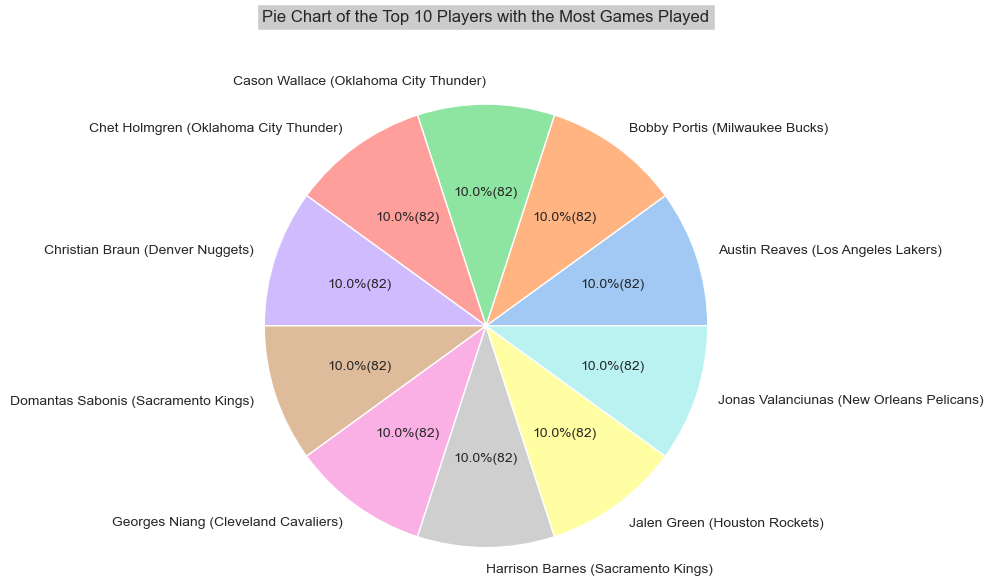

In [297]:
# Top 10 Players with the Players with the Most Games Played

# Get games played for each player
games_played_data = df2.groupby(['Name'])['Games Played'].sum()

# Get the top 10 players with the most games played along with their teams
most_games_played = df2.groupby(['Name', 'Team'])['Games Played'].sum().nlargest(10)

# Create labels with player's name and team
labels = ['{} ({})'.format(name, team) for (name, team), _ in most_games_played.items()]

plt.title("Pie Chart of the Top 10 Players with the Most Games Played", bbox={'facecolor':'0.8'}, y = 1.3, fontsize=12)

# Define Seaborn color palette to use
palette_color = sns.color_palette('pastel')
  
# Plotting data on chart
piechart = plt.pie(most_games_played, labels=labels, colors=palette_color, \
        autopct=lambda p: '{:.1f}%({:.0f})'.format(p,(p/100)*most_games_played.sum()), radius = 1.50)
  
# Displaying chart
plt.show()



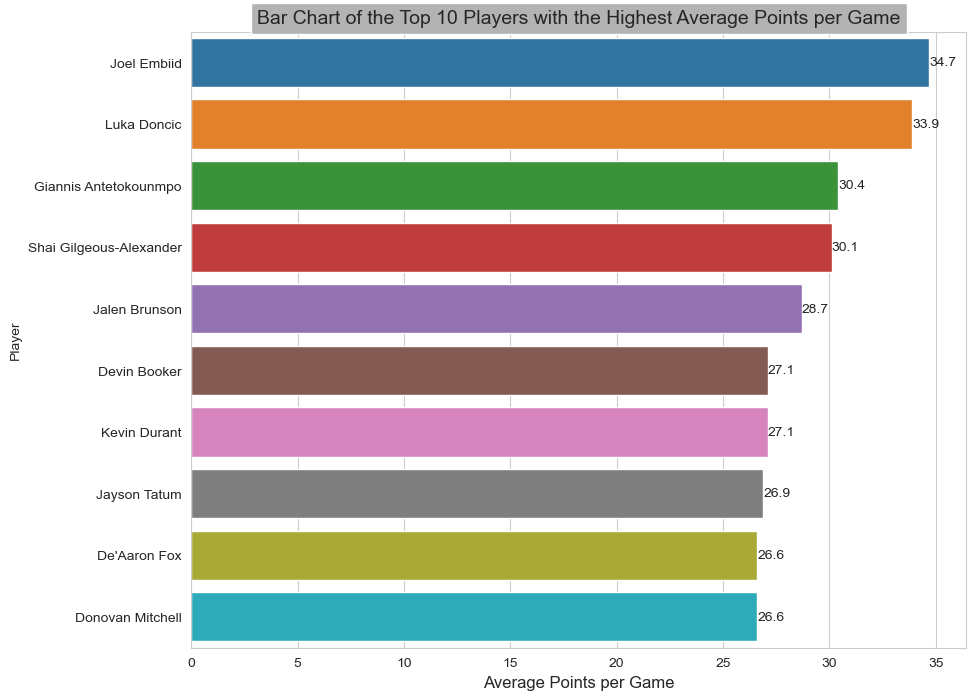

In [298]:
# Top 10 Players with the Highest Average Points per Game


# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get average points per game for each player
avg_points_per_game = df2.groupby('Name')['Points Per Game'].mean()

# Get the top 10 players with the highest average points per game
top_avg_points = avg_points_per_game.nlargest(10)


plt.title("Bar Chart of the Top 10 Players with the Highest Average Points per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

bar_chart = sns.barplot(x=top_avg_points.values, y=top_avg_points.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Points per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  
plt.show()


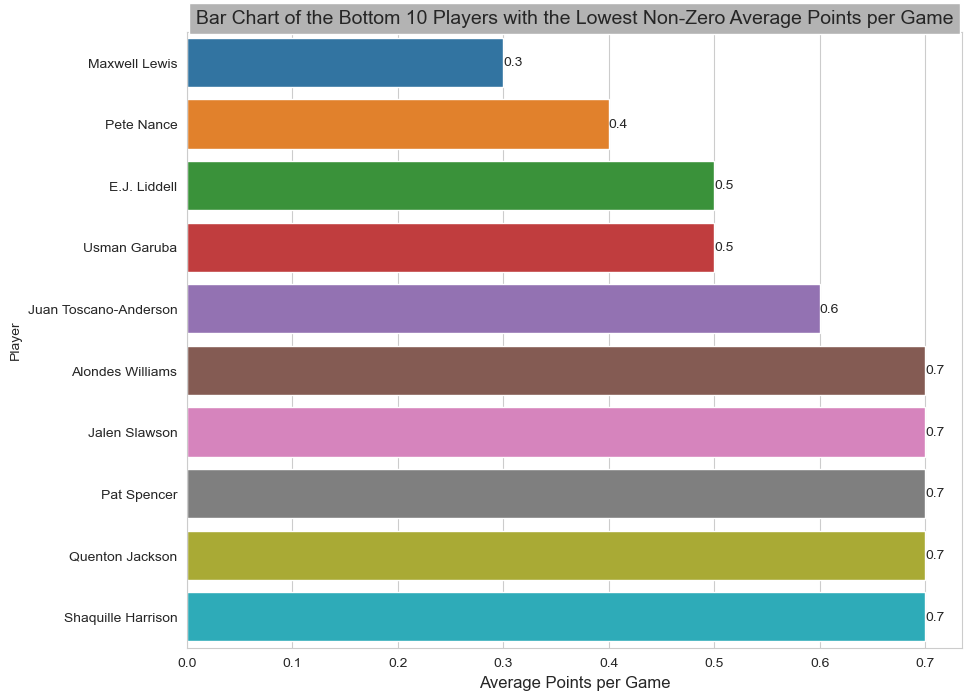

In [299]:
# Top 10 Players with the Lowest Average Points per Game

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Filter out players with non-zero average points per game
non_zero_avg_points = avg_points_per_game[avg_points_per_game > 0]

# Get the bottom 10 players with the lowest non-zero average points per game
bottom_avg_points = non_zero_avg_points.nsmallest(10)

# Plot Graph
plt.title("Bar Chart of the Bottom 10 Players with the Lowest Non-Zero Average Points per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)
bar_chart = sns.barplot(x=bottom_avg_points.values, y=bottom_avg_points.index, orient='h')
bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Points per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()



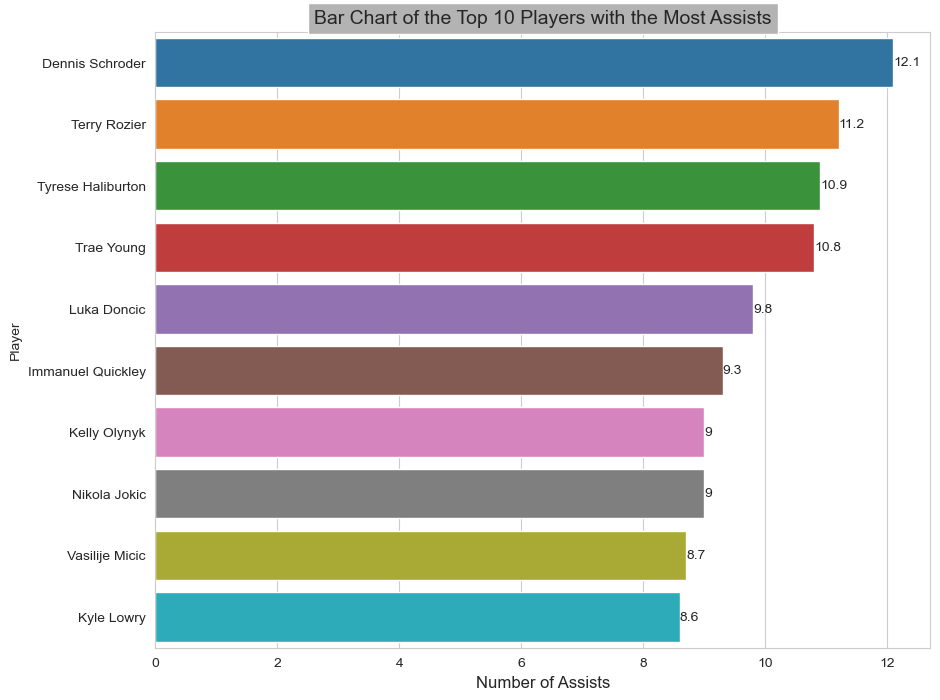

In [300]:
# Top 10 Players with the Most Assists

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get assists per game for each player in all games
assist_data = df2.groupby(['Name'])

# Get number of assists made by each player
assist_count = assist_data.sum()['Assists Per Game']

# Get the top 10 players with the most assists
most_assists = assist_count.sort_values(ascending=False)[:10]

plt.title("Bar Chart of the Top 10 Players with the Most Assists", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot
bar_chart = sns.barplot(x=most_assists.values, y=most_assists.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Number of Assists', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


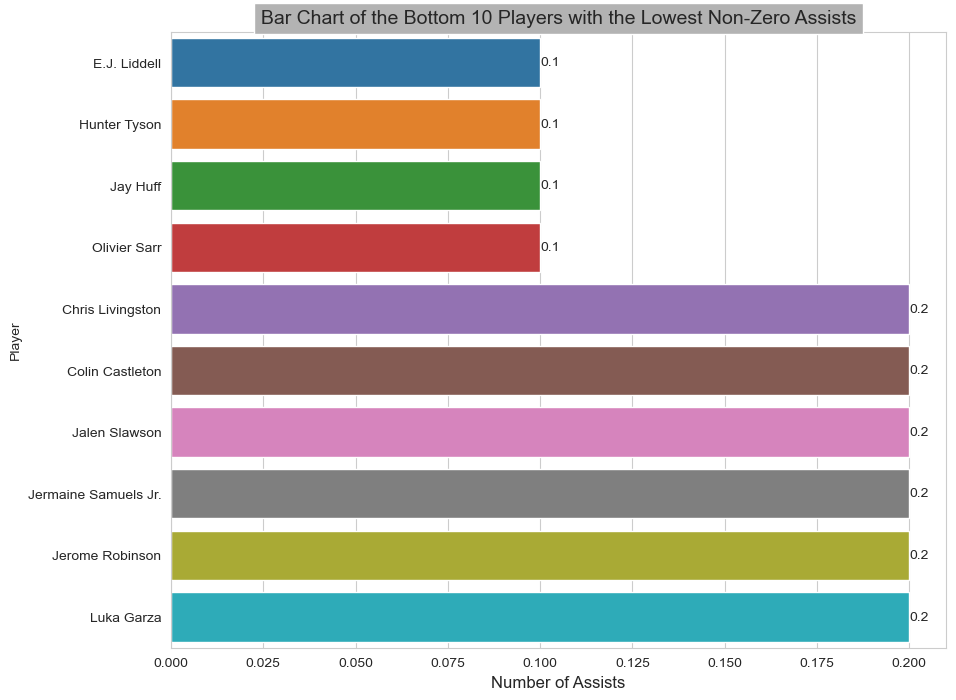

In [301]:
# Top 10 Players with the least Assists

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get assists per game for each player in all games
assist_data = df2.groupby(['Name'])

# Get number of assists made by each player
assist_count = assist_data.sum()['Assists Per Game']

# Filter out players with non-zero assists per game
non_zero_assists = assist_count[assist_count > 0]

# Get the bottom 10 players with the lowest non-zero assists
least_assists = non_zero_assists.nsmallest(10)

plt.title("Bar Chart of the Bottom 10 Players with the Lowest Non-Zero Assists", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot
bar_chart = sns.barplot(x=least_assists.values, y=least_assists.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Number of Assists', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


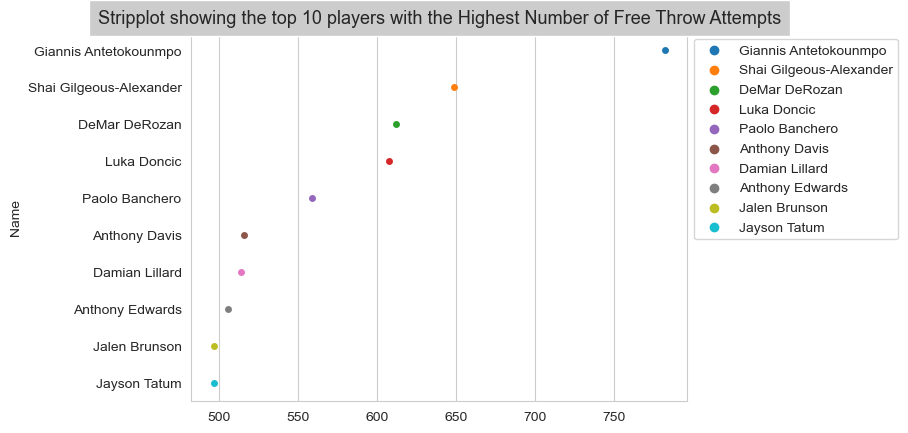

Name
Giannis Antetokounmpo      782
Shai Gilgeous-Alexander    649
DeMar DeRozan              612
Luka Doncic                608
Paolo Banchero             559
Anthony Davis              516
Damian Lillard             514
Anthony Edwards            506
Jalen Brunson              497
Jayson Tatum               497
Name: Free Throw Attempts, dtype: int64


In [302]:
# Top 10 Players with the Highest Number of Free Throw Attempts

# Get free throw attempts for each player in all games
free_throw_data = df2.groupby(['Name'])

# Get number of free throw attempts hit by each player
free_throw_count = free_throw_data.sum()['Free Throw Attempts']

# Get the top 10 players with the most free throw attempts
most_free_throws = free_throw_count.sort_values(ascending=False)[:10]

plt.title("Stripplot showing the top 10 players with the Highest Number of Free Throw Attempts", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

# Create a Strip plot 
stripplot = sns.stripplot(y=most_free_throws.index ,x=most_free_throws.values, hue=most_free_throws.index,jitter=True, data=most_free_throws)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

# Print pivot table
print(most_free_throws)


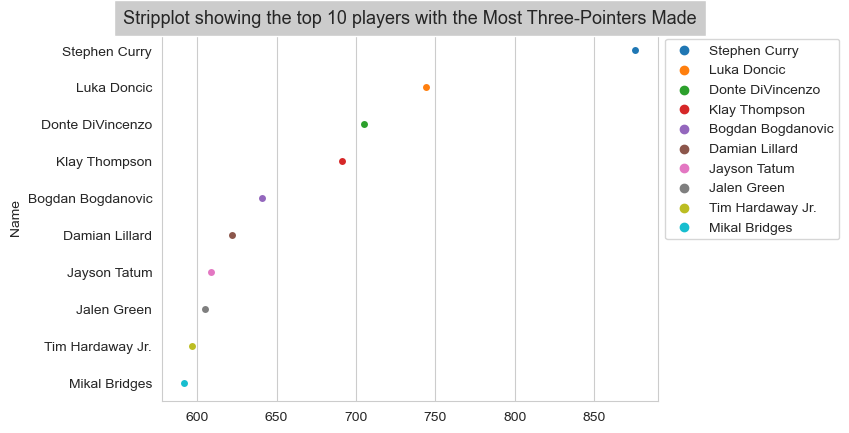

Name
Stephen Curry        876
Luka Doncic          744
Donte DiVincenzo     705
Klay Thompson        691
Bogdan Bogdanovic    641
Damian Lillard       622
Jayson Tatum         609
Jalen Green          605
Tim Hardaway Jr.     597
Mikal Bridges        592
Name: Three-Point Attempts, dtype: int64


In [303]:
# Top 10 Players with the Highest Number of Three Pointer Attempts

# Get three-point attempts for each player in all games
three_point_data = df2.groupby(['Name'])

# Get number of three-point attempts hit by each player
three_point_count = three_point_data.sum()['Three-Point Attempts']

# Get the top 10 players with the most three-point attempts
most_three_points = three_point_count.sort_values(ascending=False)[:10]

plt.title("Stripplot showing the top 10 players with the Most Three-Pointers Made", bbox={'facecolor':'0.8', 'pad':6}, fontsize=13)

# Create a Strip plot 
stripplot = sns.stripplot(y=most_three_points.index ,x=most_three_points.values, hue=most_three_points.index,jitter=True, data=most_three_points)
plt.legend(bbox_to_anchor=(1, 1), loc=2)
plt.show()

# Print pivot table
print(most_three_points)

In [304]:
# NBA PLAYER DEFENDING ANALYSIS

In [305]:
# # Top 10 Players with the Most Total Rebounds 

# Calculate total rebounds for each player
df2['Total Rebounds'] = df2['Rebounds Per Game'] * df2['Games Played']

# Get the top 10 players with the most total rebounds
top_rebounders = df2.nlargest(10, 'Total Rebounds')

# Create a pivot table
pivot_table_rebounds = top_rebounders.pivot_table(values='Total Rebounds', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_rebounds)


                                                       Total Rebounds
Name                  Team                   Position                
Anthony Davis         Los Angeles Lakers     Center             957.6
Clint Capela          Atlanta Hawks          Center             773.8
Domantas Sabonis      Sacramento Kings       Center            1123.4
Giannis Antetokounmpo Milwaukee Bucks        Forward            839.5
Jarrett Allen         Cleveland Cavaliers    Center             808.5
Jusuf Nurkic          Phoenix Suns           Center             836.0
Nikola Jokic          Denver Nuggets         Center             979.6
Nikola Vucevic        Chicago Bulls          Center             798.0
Rudy Gobert           Minnesota Timberwolves Center             980.4
Victor Wembanyama     San Antonio Spurs      Forward            752.6


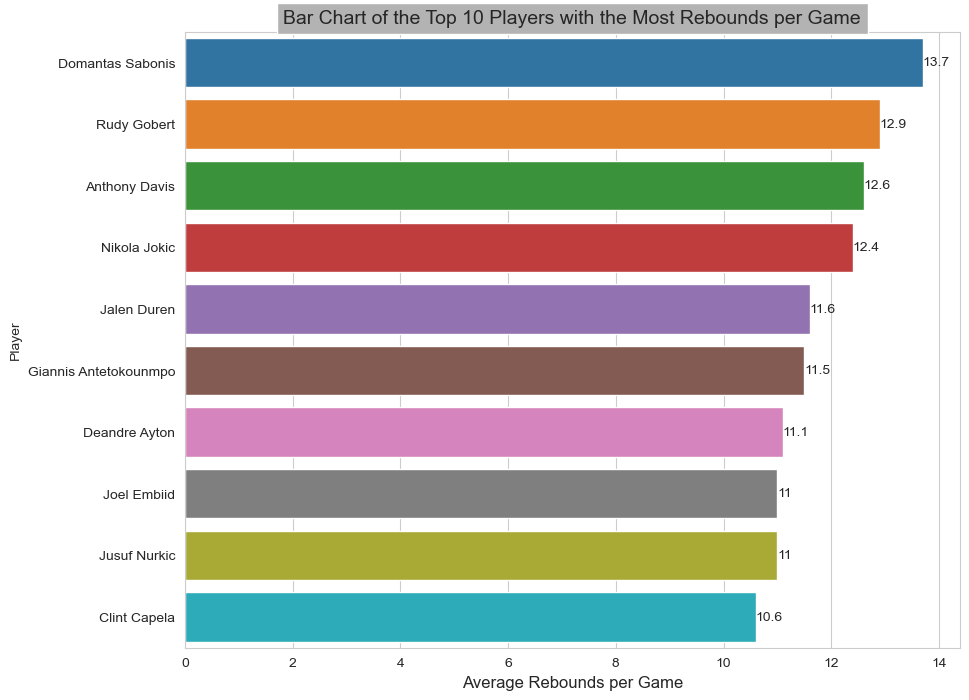

In [306]:
# Top 10 Players with the Most Rebounds per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get rebounds per game for each player
rebounds_data = df2.groupby(['Name'])['Rebounds Per Game'].mean()

# Get the top 10 players with the most rebounds per game
most_rebounds = rebounds_data.nlargest(10)

plt.title("Bar Chart of the Top 10 Players with the Most Rebounds per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot 
bar_chart = sns.barplot(x=most_rebounds.values, y=most_rebounds.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Rebounds per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


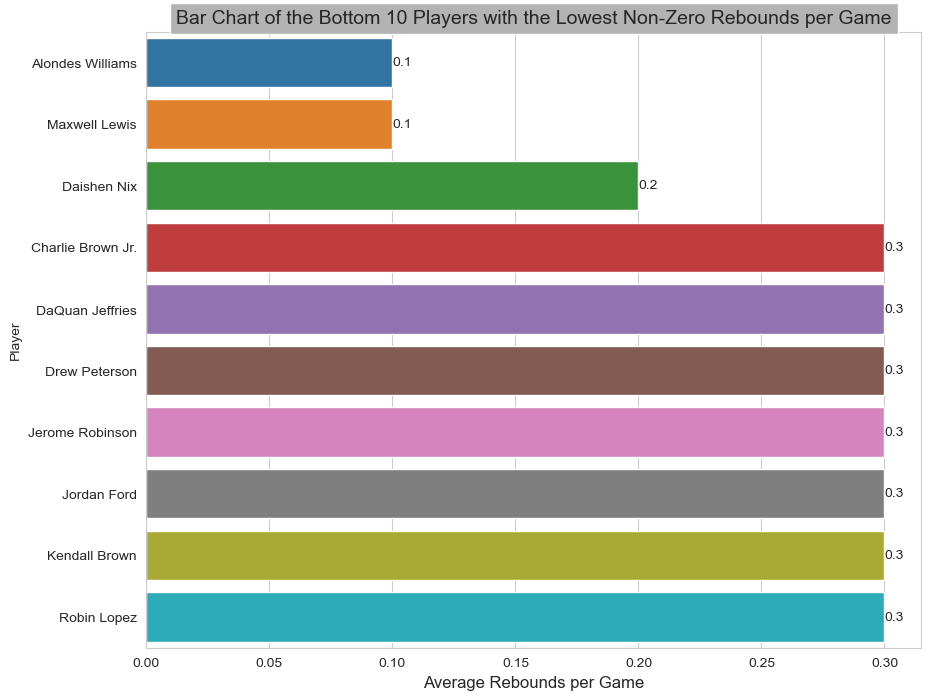

In [307]:
# Top 10 Players with the Lowest Rebounds Per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get rebounds per game for each player
rebounds_data = df2.groupby(['Name'])['Rebounds Per Game'].mean()

# Filter out players with non-zero rebounds per game
non_zero_rebounds = rebounds_data[rebounds_data > 0]

# Get the bottom 10 players with the lowest non-zero rebounds per game
least_rebounds = non_zero_rebounds.nsmallest(10)

plt.title("Bar Chart of the Bottom 10 Players with the Lowest Non-Zero Rebounds per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot: Line graph where 1 data type is categorical and the other is numeric 
bar_chart = sns.barplot(x=least_rebounds.values, y=least_rebounds.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Rebounds per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


In [308]:
# Top 10 Players with the Most Total Steals

# Calculate total steals for each player
df2['Total Steals'] = df2['Steals Per Game'] * df2['Games Played']

# Get the top 10 players with the most total steals
top_stealers = df2.nlargest(10, 'Total Steals')

# Create a pivot table
pivot_table_steals = top_stealers.pivot_table(values='Total Steals', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_steals)



                                                         Total Steals
Name                    Team                   Position              
Alex Caruso             Chicago Bulls          Guard            120.7
De'Aaron Fox            Sacramento Kings       Guard            148.0
Dejounte Murray         Atlanta Hawks          Guard            109.2
Donte DiVincenzo        New York Knicks        Guard            105.3
Herbert Jones           New Orleans Pelicans   Guard            106.4
Kawhi Leonard           Los Angeles Clippers   Forward          108.8
Matisse Thybulle        Portland Trail Blazers Forward          110.5
Nikola Jokic            Denver Nuggets         Center           110.6
Paul George             Los Angeles Clippers   Guard            111.0
Shai Gilgeous-Alexander Oklahoma City Thunder  Guard            150.0


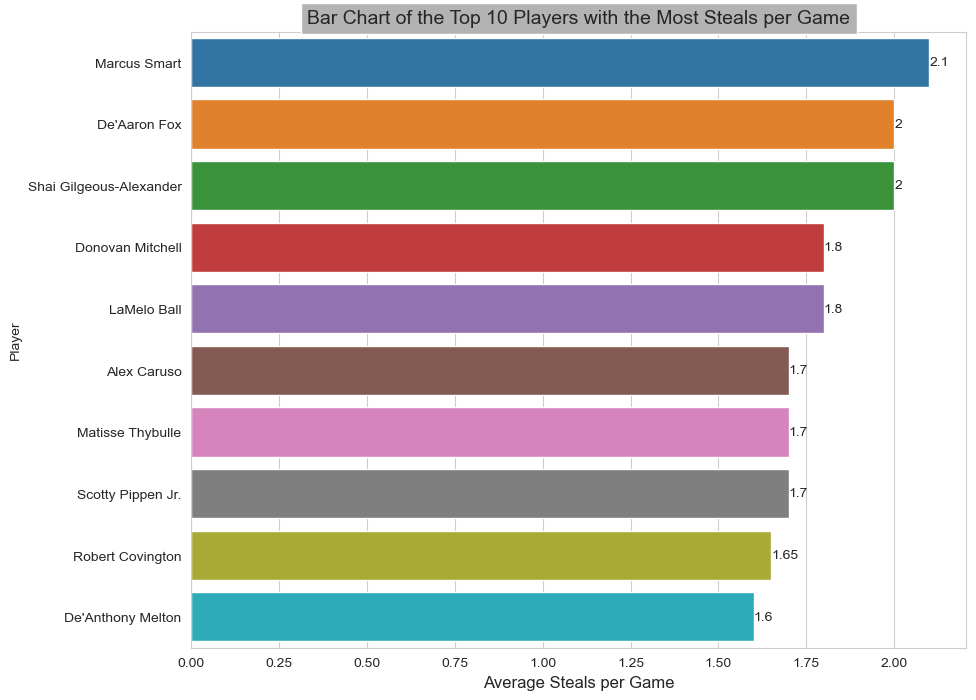

In [309]:
# Top 10 Players with the Highest Steals per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get steals per game for each player
steals_data = df2.groupby(['Name'])['Steals Per Game'].mean()

# Get the top 10 players with the most steals per game
most_steals = steals_data.nlargest(10)

plt.title("Bar Chart of the Top 10 Players with the Most Steals per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot 
bar_chart = sns.barplot(x=most_steals.values, y=most_steals.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Steals per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


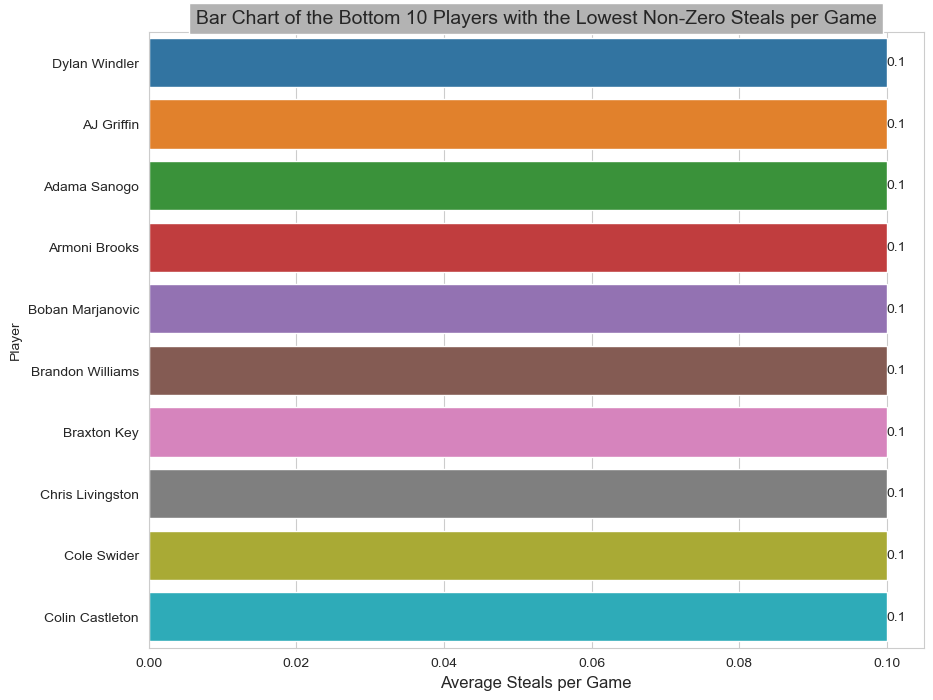

In [310]:
# Top 10 Players with the Lowest Steals per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Get steals per game for each player
steals_data = df2.groupby(['Name'])['Steals Per Game'].mean()

# Filter out players with non-zero steals per game
non_zero_steals = steals_data[steals_data > 0]

# Get the bottom 10 players with the lowest non-zero steals per game
least_steals = non_zero_steals.nsmallest(10)

plt.title("Bar Chart of the Bottom 10 Players with the Lowest Non-Zero Steals per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot 
bar_chart = sns.barplot(x=least_steals.values, y=least_steals.index, orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Steals per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


In [311]:
# Top 10 Players with the Most Total Blocks 

# Assuming 'Blocks Per Game' column represents the number of blocks per game

# Calculate total blocks for each player
df2['Total Blocks'] = df2['Blocks Per Game'] * df2['Games Played']

# Get the top 10 players with the most total blocks
top_blockers = df2.nlargest(10, 'Total Blocks')

# Create a pivot table
pivot_table_blocks = top_blockers.pivot_table(values='Total Blocks', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_blocks)


                                                    Total Blocks
Name               Team                   Position              
Anthony Davis      Los Angeles Lakers     Center           174.8
Brook Lopez        Milwaukee Bucks        Center           189.6
Chet Holmgren      Oklahoma City Thunder  Center           188.6
Clint Capela       Atlanta Hawks          Center           109.5
Kristaps Porzingis Boston Celtics         Center           108.3
Myles Turner       Indiana Pacers         Center           146.3
Nic Claxton        Brooklyn Nets          Center           142.0
Rudy Gobert        Minnesota Timberwolves Center           159.6
Victor Wembanyama  San Antonio Spurs      Forward          255.6
Walker Kessler     Utah Jazz              Center           153.6


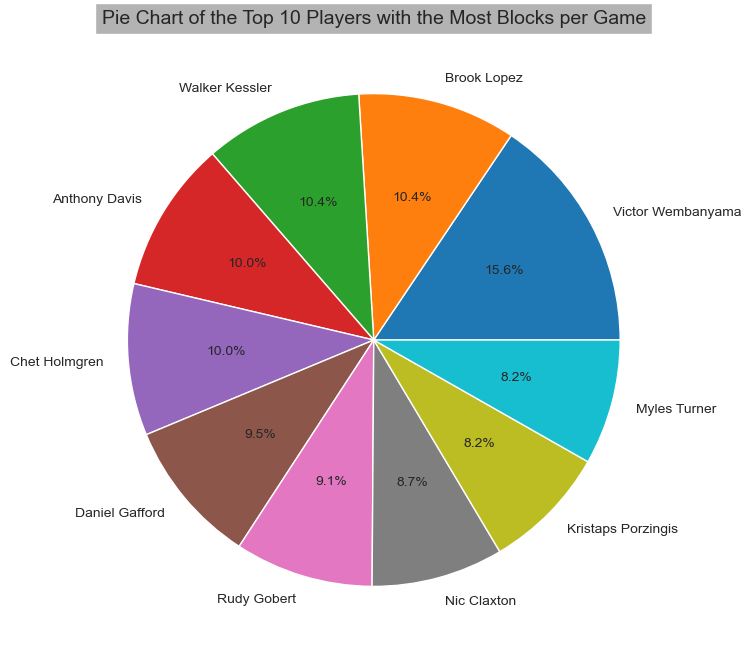

In [312]:
# Top 10 Players with the Highest Blocks per Game 

# Plot size
plt.figure(figsize=(10,8), dpi=100)

plt.title("Pie Chart of the Top 10 Players with the Most Blocks per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Pie chart
most_blocks = df2.nlargest(10, 'Blocks Per Game')
pie_chart = plt.pie(most_blocks['Blocks Per Game'], labels=most_blocks['Name'], autopct='%1.1f%%')

plt.show()


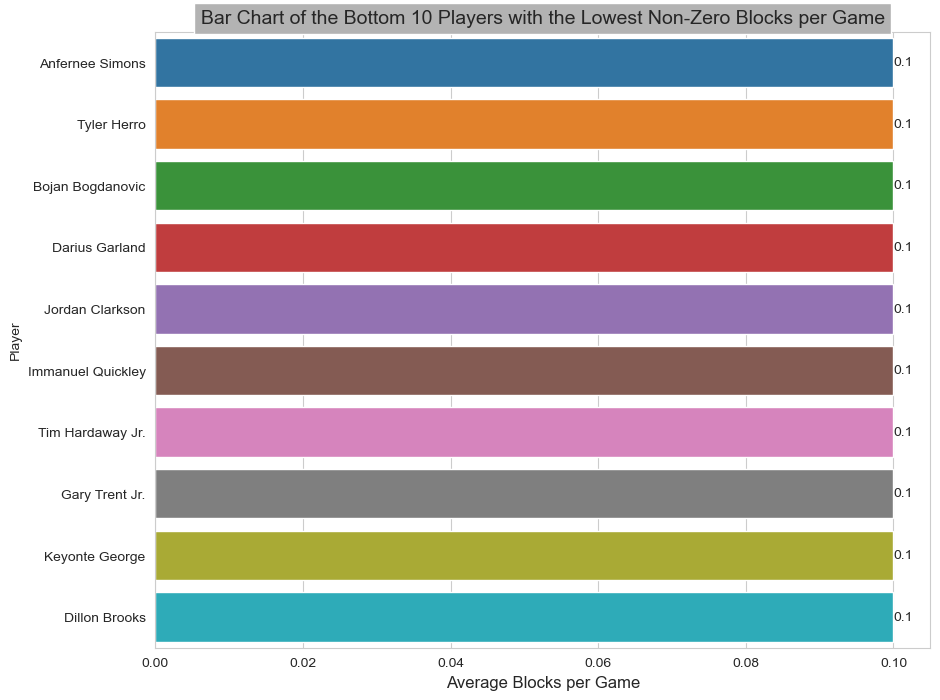

In [313]:
# Top 10 Players with the Lowest Blocks per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Filter out players with non-zero blocks per game
non_zero_blocks = df2[df2['Blocks Per Game'] > 0]

# Get the bottom 10 players with the lowest non-zero blocks per game
least_blocks = non_zero_blocks.nsmallest(10, 'Blocks Per Game')

plt.title("Bar Chart of the Bottom 10 Players with the Lowest Non-Zero Blocks per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot 
bar_chart = sns.barplot(x=least_blocks['Blocks Per Game'], y=least_blocks['Name'], orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Blocks per Game', fontsize=12)
plt.ylabel('Player', fontsize=10) 
plt.show()


In [314]:
# Top 10 Players with the Most Turnovers 

# Calculate total turnovers for each player
df2['Total Turnovers'] = df2['Turnovers Per Game'] * df2['Games Played']

# Get the top 10 players with the most total turnovers
top_turnovers = df2.nlargest(10, 'Total Turnovers')

# Create a pivot table
pivot_table_turnovers = top_turnovers.pivot_table(values='Total Turnovers', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_turnovers)


                                                       Total Turnovers
Name                  Team                   Position                 
Anthony Edwards       Minnesota Timberwolves Guard               244.9
Domantas Sabonis      Sacramento Kings       Center              270.6
Giannis Antetokounmpo Milwaukee Bucks        Forward             248.2
Kevin Durant          Phoenix Suns           Forward             247.5
LeBron James          Los Angeles Lakers     Forward             241.4
Luka Doncic           Dallas Mavericks       Guard               280.0
Nikola Jokic          Denver Nuggets         Center              237.0
Paolo Banchero        Orlando Magic          Forward             248.0
Trae Young            Atlanta Hawks          Guard               237.6
Victor Wembanyama     San Antonio Spurs      Forward             262.7


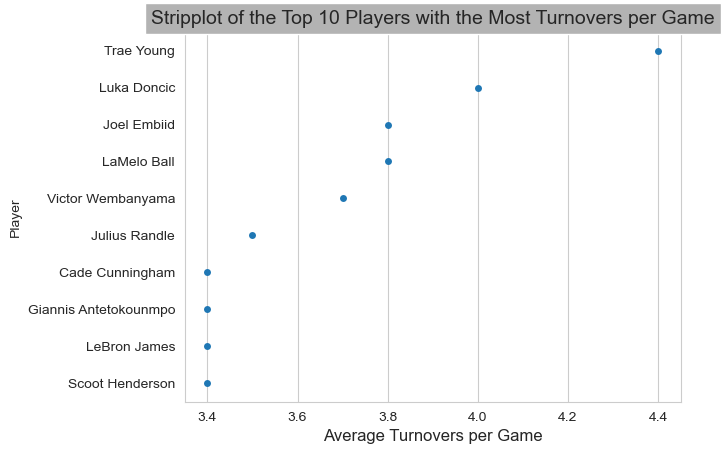

In [315]:
# Top 10 Players with the Most Turnovers per Game 

# Get turnovers per game for each player
turnovers_data = df2.groupby(['Name'])['Turnovers Per Game'].mean()

# Get the top 10 players with the most turnovers per game
most_turnovers = turnovers_data.nlargest(10)

plt.title("Stripplot of the Top 10 Players with the Most Turnovers per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Strip plot
stripplot = sns.stripplot(x=most_turnovers.values, y=most_turnovers.index, orient='h', jitter=True)

# Label Axes
plt.xlabel('Average Turnovers per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


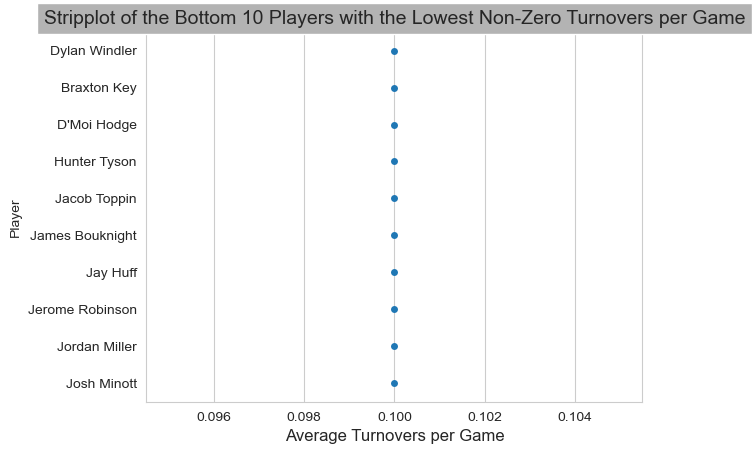

In [316]:
# Top 10 Players with the least Turnovers per Game 

# Get turnovers per game for each player
turnovers_data = df2.groupby(['Name'])['Turnovers Per Game'].mean()

# Filter out players with non-zero turnovers per game
non_zero_turnovers = turnovers_data[turnovers_data > 0]

# Get the bottom 10 players with the lowest non-zero turnovers per game
least_turnovers = non_zero_turnovers.nsmallest(10)

plt.title("Stripplot of the Bottom 10 Players with the Lowest Non-Zero Turnovers per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Strip plot: Line graph where 1 data type is categorical and the other is numeric 
stripplot = sns.stripplot(x=least_turnovers.values, y=least_turnovers.index, orient='h', jitter=True)

# Label Axes
plt.xlabel('Average Turnovers per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  # Decrease font size
plt.show()


In [317]:
# OVERALL PLAYER STATS

In [318]:
# Top 10 Players with the Most Points and Rebounds

# Calculate total points and rebounds for each player
df2['Total Points and Rebounds'] = (df2['Points Per Game'] + df2['Rebounds Per Game']) * df2['Games Played']

# Get the top 10 players with the most total points and rebounds
top_points_rebounds = df2.nlargest(10, 'Total Points and Rebounds')

# Create a pivot table
pivot_table_points_rebounds = top_points_rebounds.pivot_table(values='Total Points and Rebounds', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_points_rebounds)


                                                         Total Points and Rebounds
Name                    Team                   Position                           
Anthony Davis           Los Angeles Lakers     Center                       2834.8
Anthony Edwards         Minnesota Timberwolves Guard                        2472.7
Domantas Sabonis        Sacramento Kings       Center                       2714.2
Giannis Antetokounmpo   Milwaukee Bucks        Forward                      3058.7
Jalen Brunson           New York Knicks        Guard                        2487.1
Jayson Tatum            Boston Celtics         Forward                      2590.0
Kevin Durant            Phoenix Suns           Forward                      2527.5
Luka Doncic             Dallas Mavericks       Guard                        3017.0
Nikola Jokic            Denver Nuggets         Center                       3065.2
Shai Gilgeous-Alexander Oklahoma City Thunder  Guard                        2670.0


In [319]:
# Top 10 Players with the Most Points and Assists

# Calculate total points and assists for each player
df2['Total Points and Assists'] = (df2['Points Per Game'] + df2['Assists Per Game']) * df2['Games Played']

# Get the top 10 players with the most total points and assists
top_points_assists = df2.nlargest(10, 'Total Points and Assists')

# Create a pivot table
pivot_table_points_assists = top_points_assists.pivot_table(values='Total Points and Assists', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_points_assists)


                                                         Total Points and Assists
Name                    Team                   Position                          
Anthony Edwards         Minnesota Timberwolves Guard                       2449.0
De'Aaron Fox            Sacramento Kings       Guard                       2382.8
Giannis Antetokounmpo   Milwaukee Bucks        Forward                     2693.7
Jalen Brunson           New York Knicks        Guard                       2725.8
Jayson Tatum            Boston Celtics         Forward                     2353.2
Kevin Durant            Phoenix Suns           Forward                     2407.5
LeBron James            Los Angeles Lakers     Forward                     2414.0
Luka Doncic             Dallas Mavericks       Guard                       3059.0
Nikola Jokic            Denver Nuggets         Center                      2796.6
Shai Gilgeous-Alexander Oklahoma City Thunder  Guard                       2722.5


In [320]:
# Top 10 Players with the Most Points, Rebounds, and Assists

# Calculate total points, rebounds, and assists for each player
df2['Total Points, Rebounds, and Assists'] = (df2['Points Per Game'] + df2['Rebounds Per Game'] + df2['Assists Per Game']) * df2['Games Played']

# Get the top 10 players with the most total points, rebounds, and assists
top_points_rebounds_assists = df2.nlargest(10, 'Total Points, Rebounds, and Assists')

# Create a pivot table
pivot_table_points_rebounds_assists = top_points_rebounds_assists.pivot_table(values='Total Points, Rebounds, and Assists', index=['Name', 'Team', 'Position'])

# Print the pivot table
print(pivot_table_points_rebounds_assists)


                                                        Total Points, Rebounds, and Assists
Name                    Team                  Position                                     
Anthony Davis           Los Angeles Lakers    Center                                 3100.8
Domantas Sabonis        Sacramento Kings      Center                                 3386.6
Giannis Antetokounmpo   Milwaukee Bucks       Forward                                3533.2
Jalen Brunson           New York Knicks       Guard                                  3003.0
Jayson Tatum            Boston Celtics        Forward                                2952.6
Kevin Durant            Phoenix Suns          Forward                                2902.5
LeBron James            Los Angeles Lakers    Forward                                2932.3
Luka Doncic             Dallas Mavericks      Guard                                  3703.0
Nikola Jokic            Denver Nuggets        Center                            

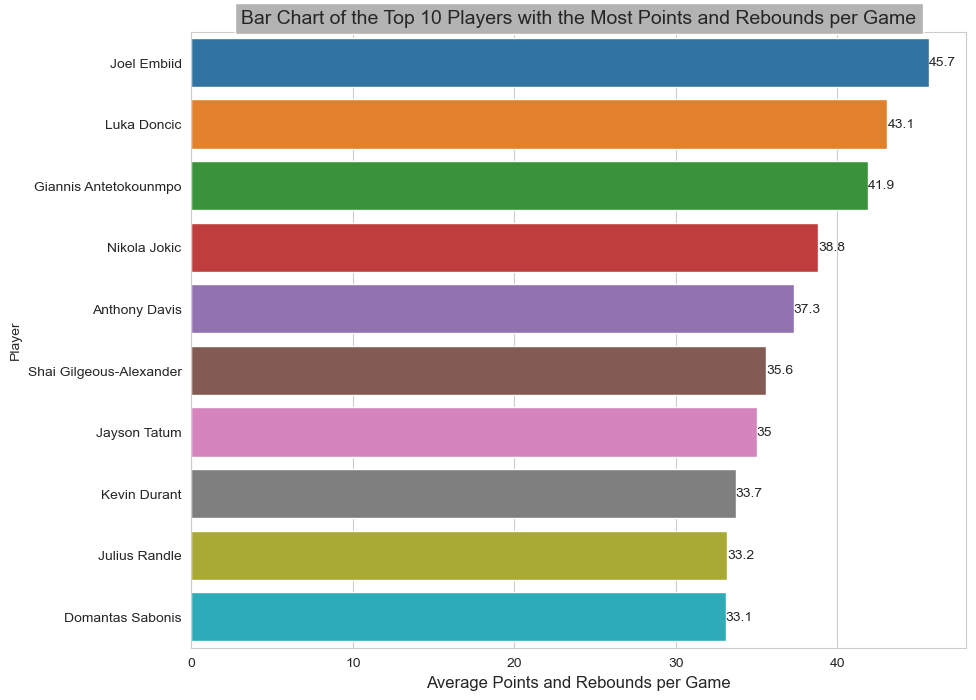

In [321]:
# Top 10 Players with the Most Points and Rebounds Per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)
           
# Calculate points and rebounds per game for each player
df2['Points and Rebounds per game'] = df2['Points Per Game'] + df2['Rebounds Per Game']

# Get the top 10 players with the most points and rebounds per game
top_points_rebounds = df2.nlargest(10, 'Points and Rebounds per game')

plt.title("Bar Chart of the Top 10 Players with the Most Points and Rebounds per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot
bar_chart = sns.barplot(x=top_points_rebounds['Points and Rebounds per game'], y=top_points_rebounds['Name'], orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Points and Rebounds per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  
plt.show()


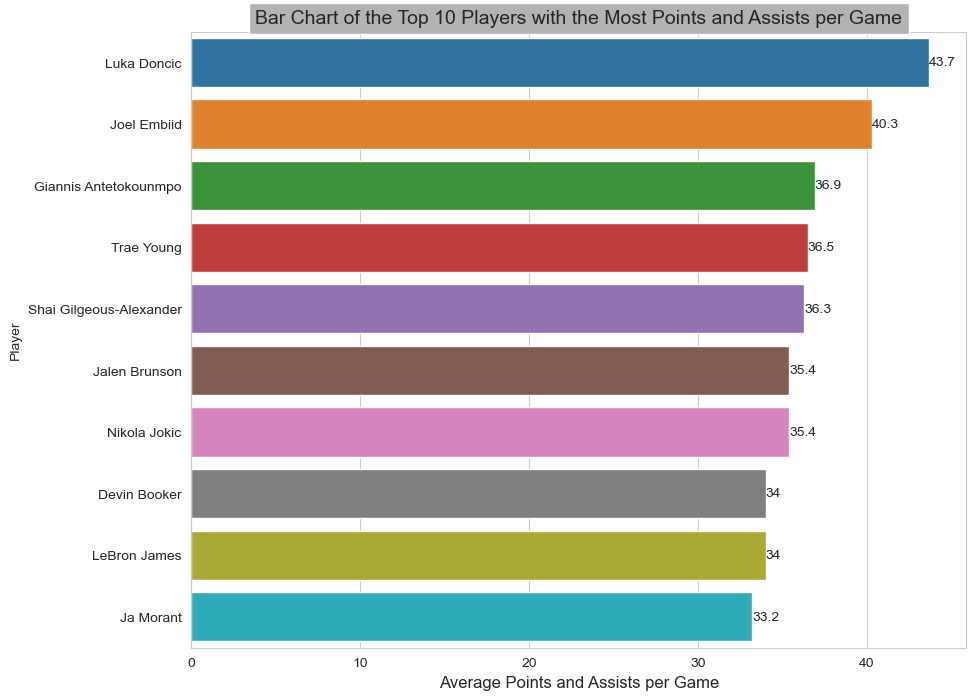

In [322]:
# Top 10 Players with the Most Points and Assists Per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Calculate points and assists per game for each player
df2['Points and Assists per game'] = df2['Points Per Game'] + df2['Assists Per Game']

# Get the top 10 players with the most points and assists per game
top_points_assists = df2.nlargest(10, 'Points and Assists per game')

plt.title("Bar Chart of the Top 10 Players with the Most Points and Assists per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot
bar_chart = sns.barplot(x=top_points_assists['Points and Assists per game'], y=top_points_assists['Name'], orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Points and Assists per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  
plt.show()


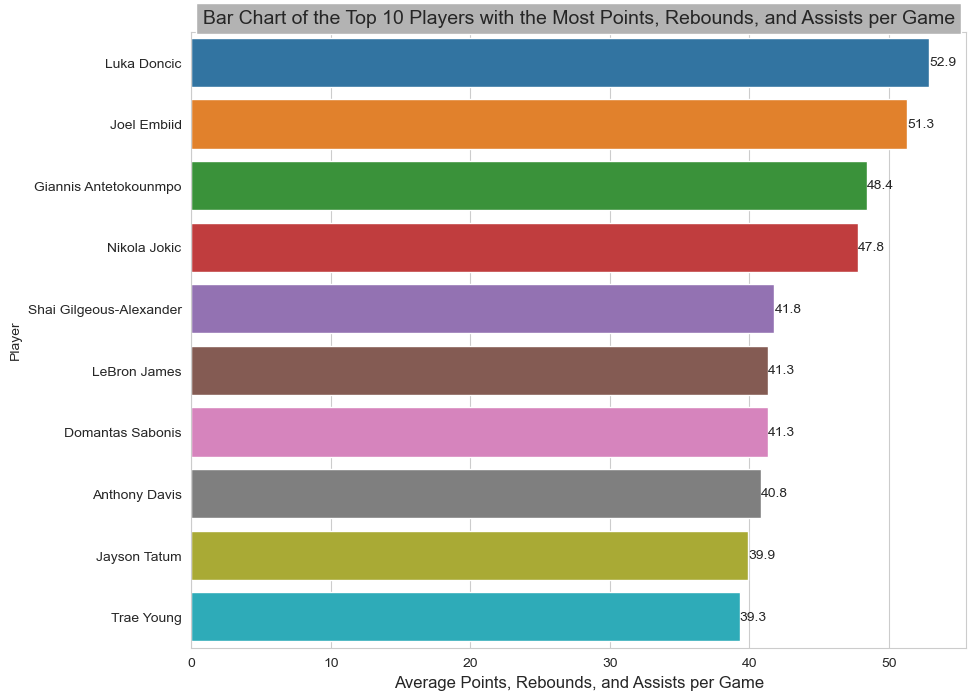

In [403]:
# Top 10 Players with the Most Points, Rebounds Assists Per Game 

# Set the style and color palette
sns.set_style("whitegrid")
color = sns.color_palette("pastel")

# Plot size
plt.figure(figsize=(10,8), dpi=100)

# Calculate points, rebounds, and assists per game for each player
df2['Points, Rebounds, and Assists per game'] = df2['Points Per Game'] + df2['Rebounds Per Game'] + df2['Assists Per Game']

# Get the top 10 players with the most points, rebounds, and assists per game
top_points_rebounds_assists = df2.nlargest(10, 'Points, Rebounds, and Assists per game')

plt.title("Bar Chart of the Top 10 Players with the Most Points, Rebounds, and Assists per Game", bbox={'facecolor':'0.7', 'pad':4}, fontsize=14)

# Create a Bar plot
bar_chart = sns.barplot(x=top_points_rebounds_assists['Points, Rebounds, and Assists per game'], y=top_points_rebounds_assists['Name'], orient='h')

bar_chart.bar_label(bar_chart.containers[0])

# Label Axes
plt.xlabel('Average Points, Rebounds, and Assists per Game', fontsize=12)
plt.ylabel('Player', fontsize=10)  
plt.show()
